<h2  style="font-weight: bold;">Data Analysis - Gendered UI/UX Design: A Comparative Study of Gender Preferences in Gender-Specific and Gender-Neutral Web Design.</h2>

<h4 style="font-weight: bold;">Bachelor's Thesis - About the survey</h4>
<p style="text-align: justify;">
    This notebook presents an analysis of the data collected during my research for my bachelor's thesis entitled "Gendered UI/UX: A Comparative Study of Gender-Specific and Gender-Neutral Web Design". My thesis is a research project that explores the impact of gender on users UI/UX design preferences. The study was conducted through a questionnaire survey and the respondents who participated in it consisted of 122 women and 106 men in Greece. At first, three different versions of a productivity web application (male, female and neutral) were developed in React JS and deployed online in Microsoft Azure. Therefore, participants were asked to interact with the interfaces and share their perspectives on the design aspects of each, by answering the questionnaires.  By conducting this comparative analysis, the research seeks to gain insights into: <br/>
    <li>Whether there are significant differences in the way users from each gender interact with these different types of design.</li>
    <li>Gender preferences in various aspects and elements of a user interface.</li>
    <li>The extent that gender influences these preferences.</li><br/>
    It is worth noting that the participants were divided into two groups, where the first group was aware of the intended gender for each version as opposed to the second group, which did not possess this information. 
</p> 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import scipy.stats
from scipy.stats import chi2_contingency

In [2]:
# Import dataset
data = pd.read_excel('thesis_data.xlsx')
data.head()

,Aware of gender target,Gender,Age,Best version,Male version rating,Female version rating,Neutral version rating,Version with best color theme,Male version color theme rating,Female version color theme rating,...,Overwhelmed by videos,Rounded/sharp edges preference,Male version usability rating,Female version usability rating,Neutral version usability rating,Comments,Male version target market,Female version target market,Neutral version target market,Biased by awareness of gender target
0,No,Male,41 - 50,Female version,3,5,4,Female version,2,4,...,No,Rounded,4,4,4,-,Men,Men & women,Men & women,-
1,No,Female,51 - 65,Female version,5,5,5,Female version,4,5,...,No,Rounded,5,5,5,Στην Α έκδοση θα μου άρεσε να είχε λίγο περισσ...,Men & women,Men & women,Men & women,-
2,No,Female,31 - 40,Neutral version,1,2,5,Neutral version,1,2,...,Yes,Rounded,2,2,5,-,Don't know,Don't know,Don't know,-
3,No,Male,18 - 30,Neutral version,4,3,5,Neutral version,3,2,...,No,Rounded,4,2,5,Η έκδοση Α έχει πολύ μεγάλα βίντεο στην που πι...,Men,Women,Men & women,-
4,No,Male,51 - 65,Male version,5,4,5,Male version,5,4,...,No,Sharp,5,5,5,-,Men,Men,Men & women,-


<h4 style="font-weight: bold;">Inspection of population's characteristics.</h4>

In [3]:
# Number of men and women who participated in the survey
data['Gender'].value_counts()

Female    122
Male      106
Name: Gender, dtype: int64

In [4]:
# Age groups of participants
data['Age'].value_counts()

18 - 30     127
51 - 65      37
41 - 50      36
31 - 40      27
Above 65      1
Name: Age, dtype: int64

In [5]:
# Set font family to Arial for all the following plots (https://matplotlib.org/stable/users/explain/customizing.html)
plt.rcParams['font.family'] = 'Arial' 

<p>Statistical representation of gender groups that participated in survey</p>

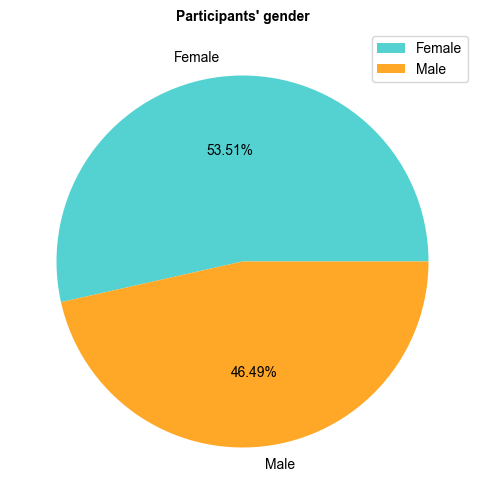

In [6]:
# Visualization of gender groups that participated in the survey
values = data['Gender'].value_counts()

plt.figure(figsize=(6, 7))
plt.pie(values, labels=values.index, autopct='%1.2f%%', colors=['#54d2d2', '#FFA726'])
plt.title('Participants\' gender', fontsize=10, fontweight='bold')
plt.legend()
plt.show()

<p>Statistical representation of age groups that participated in survey</p>

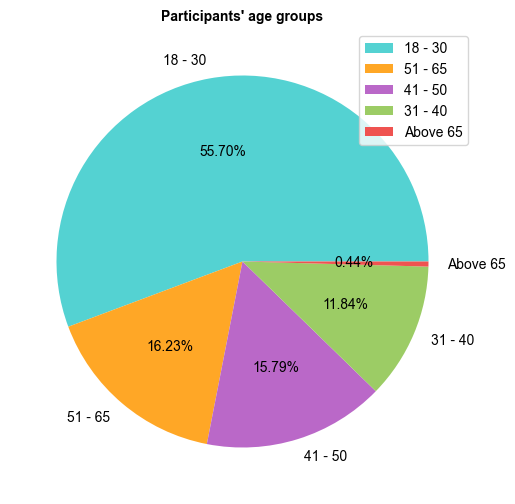

In [7]:
# Visualization of age groups that participated in the survey
values = data['Age'].value_counts()

plt.figure(figsize=(6, 7))
plt.pie(values, labels=values.index, autopct='%1.2f%%', colors=['#54d2d2', '#FFA726', '#BA68C8', '#9CCC65', '#EF5350'])
plt.title('Participants\' age groups', fontsize=10, fontweight='bold')
plt.legend(loc='upper right')
plt.show()

<h3 style="font-weight: bold;">Preffered version analysis</h3>

<h4 style="font-weight: bold;">A. Overall preferences per version (despite gender)</h4>

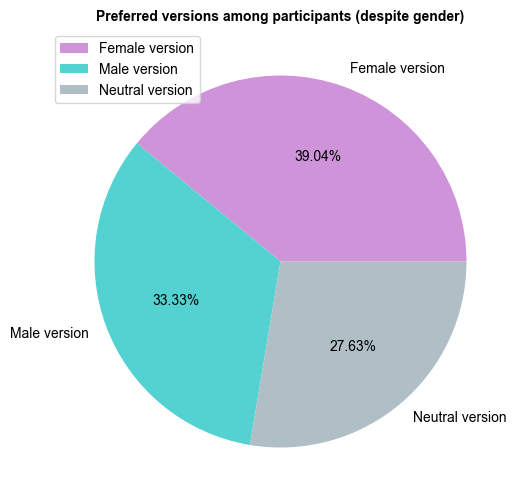

In [8]:
# Visualization of preffered versions among all participants (males and females)
values = data['Best version'].value_counts()

plt.figure(figsize=(6, 7))
plt.pie(values, labels=values.index, autopct='%1.2f%%', colors=['#CE93D8', '#54d2d2', '#B0BEC5'])
plt.title('Preferred versions among participants (despite gender)', fontsize=10, fontweight='bold')
plt.legend(loc='upper left')
plt.show()

<h4 style="font-weight: bold;">B. Gendered preferences per version</h4>

In [9]:
# Split female and male data in two different dataframes
female_preferences = data[data['Gender'] == 'Female']
male_preferences = data[data['Gender'] == 'Male']

- Gendered preferences

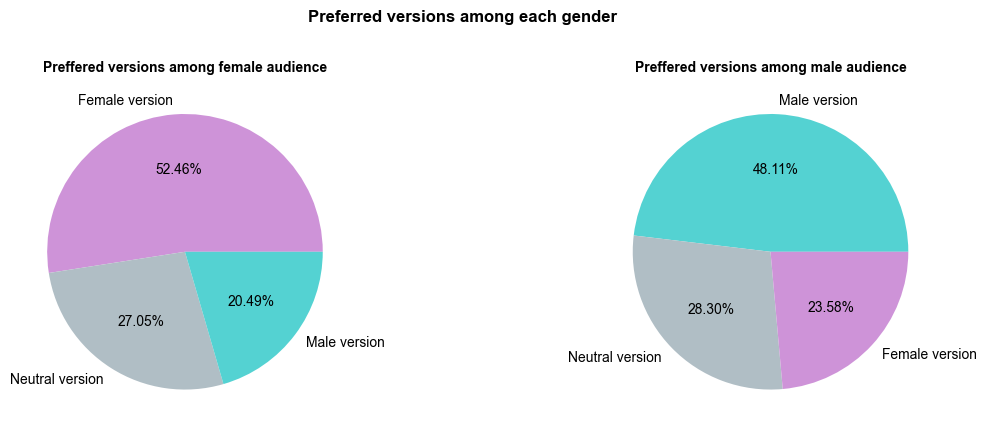

In [10]:
# Visualization of preffered versions among each gender
female_values = female_preferences['Best version'].value_counts()
male_values = male_preferences['Best version'].value_counts()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.pie(female_values, labels=female_values.index, autopct='%1.2f%%', colors=['#CE93D8','#B0BEC5', '#54d2d2'])
ax1.set_title('Preffered versions among female audience', fontsize=10, fontweight='bold')

ax2.pie(male_values, labels=male_values.index, autopct='%1.2f%%', colors=['#54d2d2', '#B0BEC5', '#CE93D8' ])
ax2.set_title('Preffered versions among male audience', fontsize=10, fontweight='bold')

fig.suptitle('Preferred versions among each gender', fontsize=12, fontweight='bold')
fig.subplots_adjust(wspace=0.7)

plt.show()

- Gendered ratings

In [11]:
# Method for plotting likert data by Eitan Lees (reference: https://stackoverflow.com/questions/23142358/create-a-diverging-stacked-bar-chart-in-matplotlib)
def survey(results, category_names, title):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1]//2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index]/2
    
    # Color Mapping
    category_colors = ["#c30d24", "#EC7063", "#cccccc", "#94c6da", "#1770ab"]
    
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.9,
                        label=colname, color=color)
        
    
    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)
    
    # X Axis
    ax.set_xlim(-90, 90)
    ax.set_xticks(np.arange(-90, 91, 10))
    ax.set_xticklabels([])  # Remove f-axis tick labels
    
    # Y Axis
    ax.invert_yaxis()
    
    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Ledgend
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    # Set Background Color
    fig.set_facecolor('#FFFFFF')
    fig.suptitle(title)

    return fig, ax

In [12]:
# Collect ratings
m_m = male_preferences['Male version rating'].value_counts() # Male version ratings from male audience
f_m = male_preferences['Female version rating'].value_counts() # Female version ratings from male audience
n_m = male_preferences['Neutral version rating'].value_counts() # Neutral version ratings from male audience
m_f = female_preferences['Male version rating'].value_counts() # Male version ratings from female audience
f_f = female_preferences['Female version rating'].value_counts() # Female version ratings from female audience
n_f = female_preferences['Neutral version rating'].value_counts() # Neutral version ratings from female audience

# Sort them based on likert scale points (from 1 to 5) (reference: https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/)
m_m = [value for key, value in sorted(m_m.items())] # Keep only the value of the sorted key-value pairs
f_m = [value for key, value in sorted(f_m.items())]
n_m = [value for key, value in sorted(n_m.items())]
m_f = [value for key, value in sorted(m_f.items())]
f_f = [value for key, value in sorted(f_f.items())]
n_f = [value for key, value in sorted(n_f.items())]

# Convert each data list to list of percentages
m_m = np.array(m_m) / np.sum(m_m) * 100
f_m = np.array(f_m) / np.sum(f_m) * 100
n_m = np.array(n_m) / np.sum(n_m) * 100
m_f = np.array(m_f) / np.sum(m_f) * 100
f_f = np.array(f_f) / np.sum(f_f) * 100
n_f = np.array(n_f) / np.sum(n_f) * 100


# Set likert scale labels
category_names = ['I dislike it', 'I like it a little',
                  'I quite like it', 'I like it a lot', 'I like it very much']

# Create a dictionary
results = {
    'Male version rating (from male audience)': m_m.tolist(),
    'Male version rating (from female audience)': m_f.tolist(),
    'Female version rating (from male audience)': f_m.tolist(),
    'Female version rating (from female audience)': f_f.tolist(),
    'Neutral version rating (from male audience)': n_m.tolist(),
    'Neutral version rating (from female audience)': n_f.tolist()
}


In [13]:
# Convert results to a dataframe
ratings_table = pd.DataFrame(results)
ratings_table.insert(0, 'Rating', category_names) # Insert likert points
ratings_table

,Rating,Male version rating (from male audience),Male version rating (from female audience),Female version rating (from male audience),Female version rating (from female audience),Neutral version rating (from male audience),Neutral version rating (from female audience)
0,I dislike it,3.773585,5.737705,3.773585,3.278689,4.716981,6.557377
1,I like it a little,18.867925,22.950820,22.641509,9.016393,15.094340,22.950820
2,I quite like it,22.641509,31.967213,39.622642,22.131148,44.339623,27.049180
3,I like it a lot,35.849057,26.229508,18.867925,30.327869,30.188679,30.327869
4,I like it very much,18.867925,13.114754,15.094340,35.245902,5.660377,13.114754


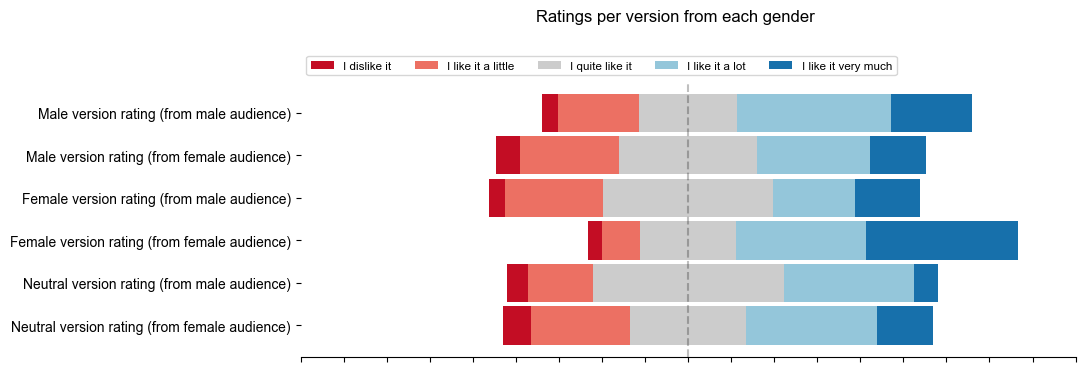

In [14]:
# Plot results
fig, ax = survey(results, category_names, 'Ratings per version from each gender')
fig.subplots_adjust(top=0.8)
fig.set_size_inches(10, 4)
plt.show()

<h4 style="font-weight: bold;">C. Gendered preferences based on the awareness of the target gender per version</h4>

<p>1. Female preferences based on the awareness of the target gender per version</p>

In [15]:
# Split data of females in two different dataframes based on the awareness of the target gender per version
female_preferences_aware = female_preferences[female_preferences['Aware of gender target'] == 'Yes'] # Females who are aware of the gender target per version
female_preferences_unaware = female_preferences[female_preferences['Aware of gender target'] == 'No'] # Females who are unaware of the gender target per version

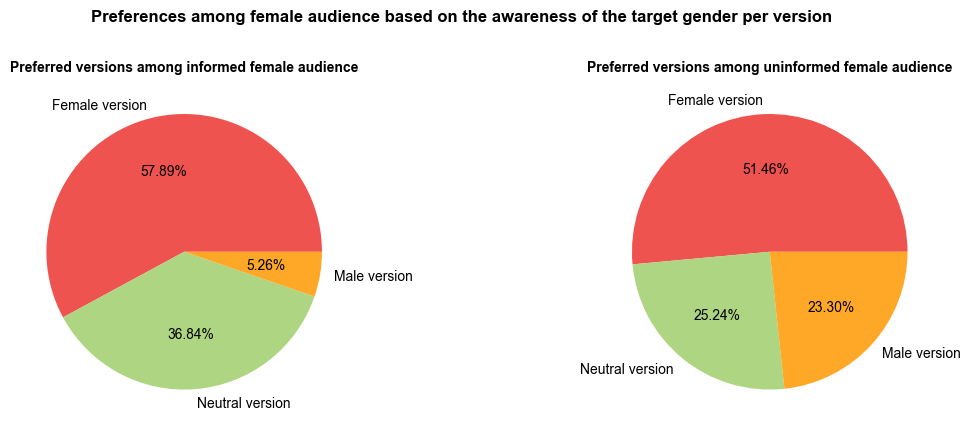

In [16]:
# Visualization of preffered versions among females who are aware and unaware of the gender target per version
female_values_aware = female_preferences_aware['Best version'].value_counts()
female_values_unaware = female_preferences_unaware['Best version'].value_counts()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.pie(female_values_aware, labels=female_values_aware.index, autopct='%1.2f%%', colors=['#EF5350', '#AED581', '#FFA726'])
ax1.set_title('Preferred versions among informed female audience', fontsize=10, fontweight='bold')

ax2.pie(female_values_unaware, labels=female_values_unaware.index, autopct='%1.2f%%', colors=['#EF5350', '#AED581', '#FFA726'])
ax2.set_title('Preferred versions among uninformed female audience', fontsize=10, fontweight='bold')

fig.suptitle('Preferences among female audience based on the awareness of the target gender per version', fontsize=12, fontweight='bold')
fig.subplots_adjust(wspace=0.7)

plt.show()

<p>2. Male preferences based on the awareness of the target gender per version</p>

In [17]:
# Split data of males in two different dataframes based on the awareness of the target gender per version
male_preferences_aware = male_preferences[male_preferences['Aware of gender target'] == 'Yes'] # Males who are aware of the gender target per version
male_preferences_unaware = male_preferences[male_preferences['Aware of gender target'] == 'No'] # Males who are unaware of the gender target per version

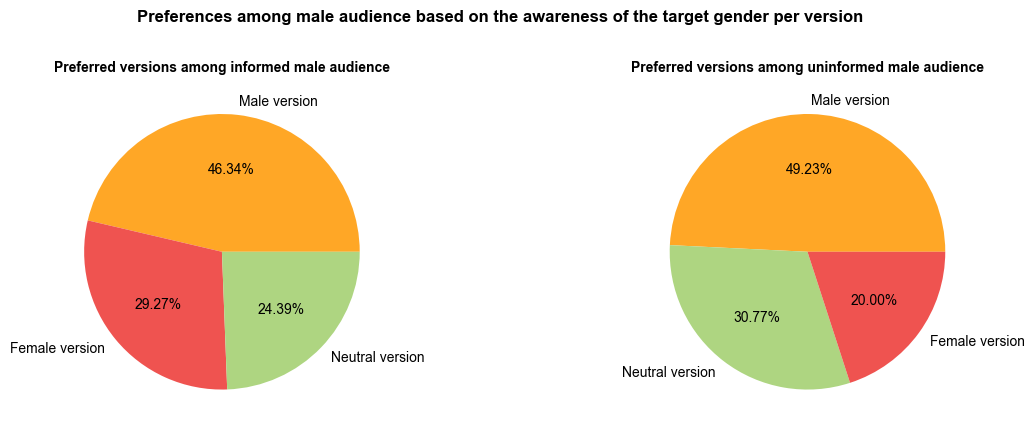

In [18]:
# Visualization of preffered versions among males who are aware and unaware of the gender target per version
male_values_aware = male_preferences_aware['Best version'].value_counts()
male_values_unaware = male_preferences_unaware['Best version'].value_counts()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.pie(male_values_aware, labels=male_values_aware.index, autopct='%1.2f%%', colors=['#FFA726', '#EF5350', '#AED581'])
ax1.set_title('Preferred versions among informed male audience', fontsize=10, fontweight='bold')

ax2.pie(male_values_unaware, labels=male_values_unaware.index, autopct='%1.2f%%', colors=['#FFA726', '#AED581', '#EF5350'])
ax2.set_title('Preferred versions among uninformed male audience', fontsize=10, fontweight='bold')

fig.suptitle('Preferences among male audience based on the awareness of the target gender per version', fontsize=12, fontweight='bold')
fig.subplots_adjust(wspace=0.7)

plt.show()

<h4 style="font-weight: bold;">D. Gendered preferences based on the participants' age groups</h4>

<p>1. Female preferences based on age groups</p>

In [19]:
# How many females belong to each age group
female_preferences['Age'].value_counts()

18 - 30    60
41 - 50    24
51 - 65    23
31 - 40    15
Name: Age, dtype: int64

In [20]:
# Collect age data for females
female_18_30 = female_preferences[female_preferences['Age'] == '18 - 30']
female_31_40 = female_preferences[female_preferences['Age'] == '31 - 40']
female_41_50 = female_preferences[female_preferences['Age'] == '41 - 50']
female_51_65 = female_preferences[female_preferences['Age'] == '51 - 65']


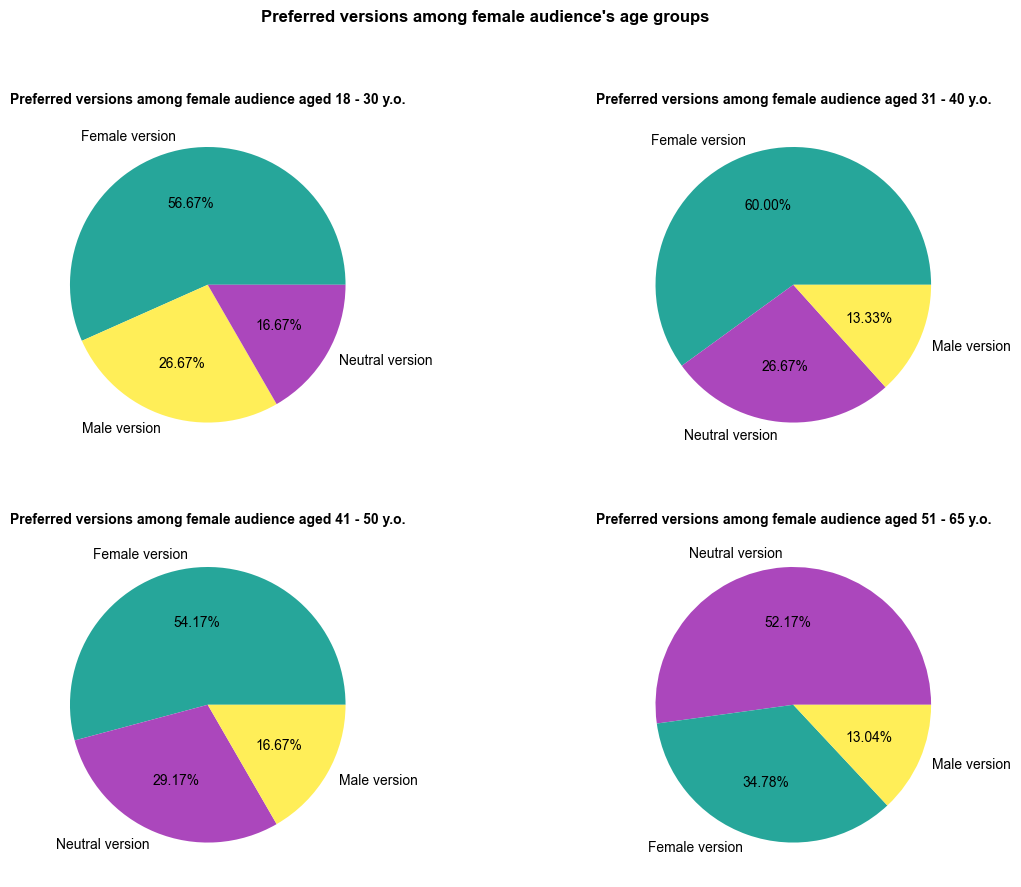

In [21]:
# Collect preferences for each age group
female_18_30_values = female_18_30['Best version'].value_counts()
female_31_40_values = female_31_40['Best version'].value_counts()
female_41_50_values = female_41_50['Best version'].value_counts()
female_51_65_values = female_51_65['Best version'].value_counts()

# Plot preferences in pie charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))

ax1.pie(female_18_30_values, labels=female_18_30_values.index, autopct='%1.2f%%', colors=['#26A69A', '#FFEE58','#AB47BC'])
ax1.set_title('Preferred versions among female audience aged 18 - 30 y.o.', fontsize=10, fontweight='bold')

ax2.pie(female_31_40_values, labels=female_31_40_values.index, autopct='%1.2f%%', colors=['#26A69A', '#AB47BC', '#FFEE58'])
ax2.set_title('Preferred versions among female audience aged 31 - 40 y.o.', fontsize=10, fontweight='bold')

ax3.pie(female_41_50_values, labels=female_41_50_values.index, autopct='%1.2f%%', colors=['#26A69A','#AB47BC', '#FFEE58'])
ax3.set_title('Preferred versions among female audience aged 41 - 50 y.o.', fontsize=10, fontweight='bold')

ax4.pie(female_51_65_values, labels=female_51_65_values.index, autopct='%1.2f%%', colors=[ '#AB47BC', '#26A69A', '#FFEE58'])
ax4.set_title('Preferred versions among female audience aged 51 - 65 y.o.', fontsize=10, fontweight='bold')

fig.suptitle('Preferred versions among female audience\'s age groups', fontsize=12, fontweight='bold')
fig.subplots_adjust(wspace=0.7)

plt.show()

<p>2. Male preferences based on age groups</p>

In [22]:
# How many males belong to each age group
male_preferences['Age'].value_counts()

18 - 30     67
51 - 65     14
41 - 50     12
31 - 40     12
Above 65     1
Name: Age, dtype: int64

In [23]:
# Collect age data for males
male_18_30 = male_preferences[male_preferences['Age'] == '18 - 30']
male_31_40 = male_preferences[male_preferences['Age'] == '31 - 40']
male_41_50 = male_preferences[male_preferences['Age'] == '41 - 50']
male_51_65 = male_preferences[male_preferences['Age'] == '51 - 65']
male_above_65 = male_preferences[male_preferences['Age'] == 'Above 65']

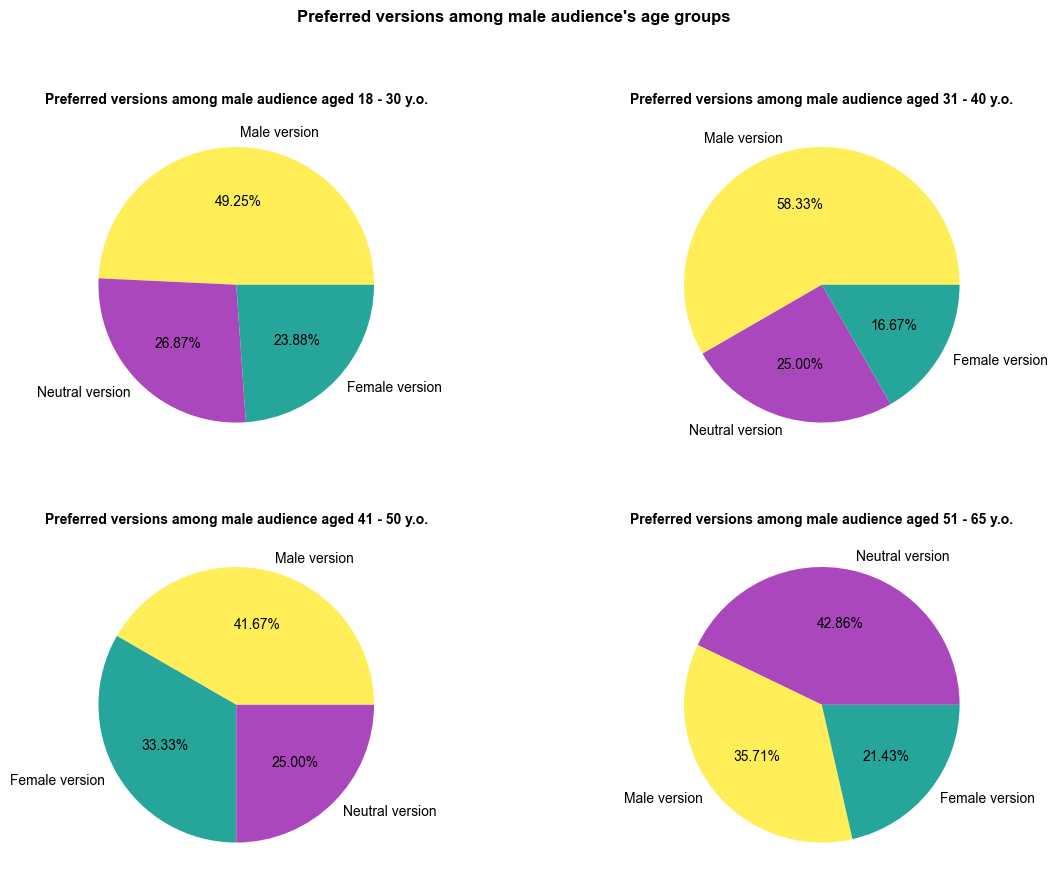

In [24]:
# Collect preferences for each age group
male_18_30_values = male_18_30['Best version'].value_counts()
male_31_40_values = male_31_40['Best version'].value_counts()
male_41_50_values = male_41_50['Best version'].value_counts()
male_51_65_values = male_51_65['Best version'].value_counts()

# Plot preferences in pie charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))

ax1.pie(male_18_30_values, labels=male_18_30_values.index, autopct='%1.2f%%', colors=['#FFEE58', '#AB47BC','#26A69A'])
ax1.set_title('Preferred versions among male audience aged 18 - 30 y.o.', fontsize=10, fontweight='bold')

ax2.pie(male_31_40_values, labels=male_31_40_values.index, autopct='%1.2f%%', colors=['#FFEE58', '#AB47BC', '#26A69A'])
ax2.set_title('Preferred versions among male audience aged 31 - 40 y.o.', fontsize=10, fontweight='bold')

ax3.pie(male_41_50_values, labels=male_41_50_values.index, autopct='%1.2f%%', colors=['#FFEE58','#26A69A', '#AB47BC'])
ax3.set_title('Preferred versions among male audience aged 41 - 50 y.o.', fontsize=10, fontweight='bold')

ax4.pie(male_51_65_values, labels=male_51_65_values.index, autopct='%1.2f%%', colors=[ '#AB47BC', '#FFEE58','#26A69A'])
ax4.set_title('Preferred versions among male audience aged 51 - 65 y.o.', fontsize=10, fontweight='bold')

fig.suptitle('Preferred versions among male audience\'s age groups', fontsize=12, fontweight='bold')
fig.subplots_adjust(wspace=0.7)

plt.show()

<p style="text-align: justify;"> <b>IMPORTANT NOTE:</b> At this point I noticed that there was only one male participant over 65 years old, so there was no point in creating a pie chart just for him. So, I studied his preferences directly from his answers to the questionnaire.</p>

In [25]:
# Isnpect the one male participant's preferences, who was above 65
male_above_65

,Aware of gender target,Gender,Age,Best version,Male version rating,Female version rating,Neutral version rating,Version with best color theme,Male version color theme rating,Female version color theme rating,...,Overwhelmed by videos,Rounded/sharp edges preference,Male version usability rating,Female version usability rating,Neutral version usability rating,Comments,Male version target market,Female version target market,Neutral version target market,Biased by awareness of gender target
143,No,Male,Above 65,Male version,4,3,3,Male version,5,4,...,No,Rounded,5,5,5,-,Men,Women,Men & women,-


<h4 style="font-weight: bold;">E. Overall ratings for each version</h4>

In [26]:
# Collect ratings
m = data['Male version rating'].value_counts()
f = data['Female version rating'].value_counts()
n = data['Neutral version rating'].value_counts()

# Sort them based on likert scale points (from 1 to 5) (reference: https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/)
m = [value for key, value in sorted(m.items())] # Keep only the value of the sorted key-value pairs
f = [value for key, value in sorted(f.items())]
n = [value for key, value in sorted(n.items())]

# Convert each data list to a list of percentages
m = np.array(m) / np.sum(m) * 100
f = np.array(f) / np.sum(f) * 100
n = np.array(n) / np.sum(n) * 100


# Set category names
category_names = ['I dislike it', 'I like it a little',
                  'I quite like it', 'I like it a lot', 'I like it very much']

# Create a dictionary
results = {
    'Male version rating': m.tolist(),
    'Female version rating': f.tolist(),
    'Neutral version rating': n.tolist()
}

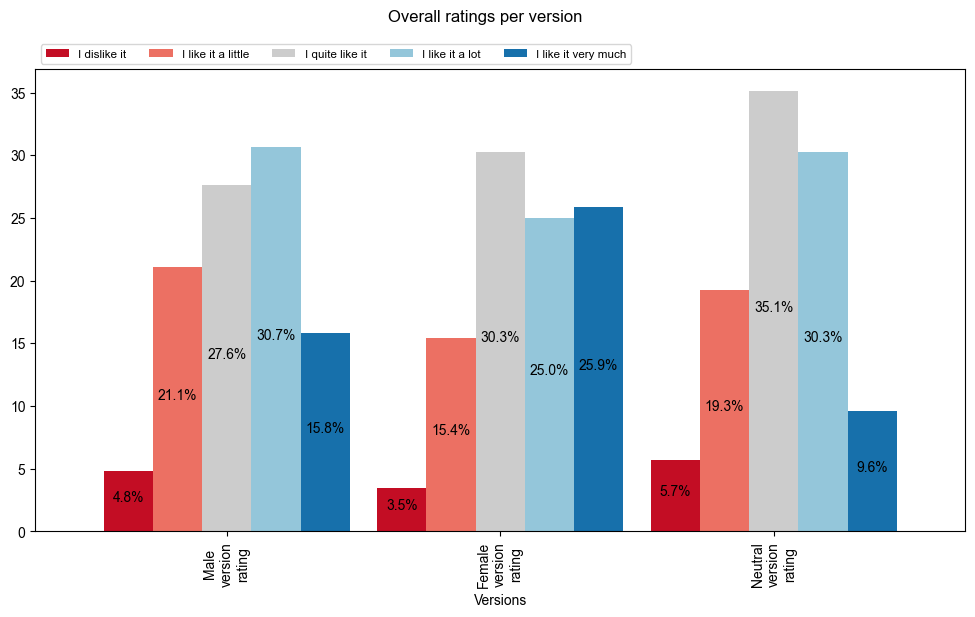

In [27]:
# Collect data to a dtaframe
ratings = pd.DataFrame([['Male version rating'] + np.round(m, 1).tolist(), ['Female version rating'] + np.round(f, 1).tolist(), ['Neutral version rating'] + np.round(n, 1).tolist()],
                  columns=['Versions'] + category_names)

# Create the figure with the subplots
fig, ax = plt.subplots()  


# Plot
ratings.plot(x='Versions',
        kind='bar',
        stacked=False,
        ax=ax, 
        width = 0.9,
        color=["#c30d24", "#EC7063", "#cccccc", "#94c6da", "#1770ab"])

# Plot styling
plt.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small') # Place legend in correct  position
fig.set_facecolor('#FFFFFF')
fig.suptitle('Overall ratings per version')
fig.set_size_inches(12, 6)
ax.set_xticklabels(textwrap.fill(v_title, width=10) for v_title in ratings['Versions']) # Wrap version titles (reference: https://docs.python.org/3/library/textwrap.html#textwrap.fill)

# Add percentages (reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)
for bar in ax.patches:
    x, y = bar.get_xy() # Left bottom coords
    percentage = f'{bar.get_height()}%' # Make percentage as a string
    ax.annotate(percentage, (x + bar.get_width() / 2, y + bar.get_height() / 2), ha='center') # Place percentage in the correct position

# Show plot
plt.show()

<h3 style="font-weight: bold;">Preferences regarding color theme per version</h3>

<h4 style="font-weight: bold;">A. Overall color theme preferences (despite gender)</h4>

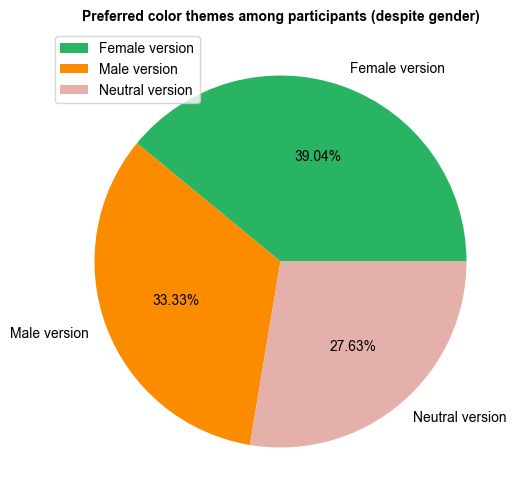

In [28]:
# Visualization of preffered color theme among all participants (males and females)
color_values = data['Version with best color theme'].value_counts()

plt.figure(figsize=(6, 7))
plt.pie(values, labels=color_values.index, autopct='%1.2f%%', colors=['#28B463', '#FB8C00', '#E6B0AA'])
plt.title('Preferred color themes among participants (despite gender)', fontsize=10, fontweight='bold')
plt.legend(loc='upper left')
plt.show()

<h4 style="font-weight: bold;">B. Gendered color theme preferences and ratings</h4>

- Gendered preferences

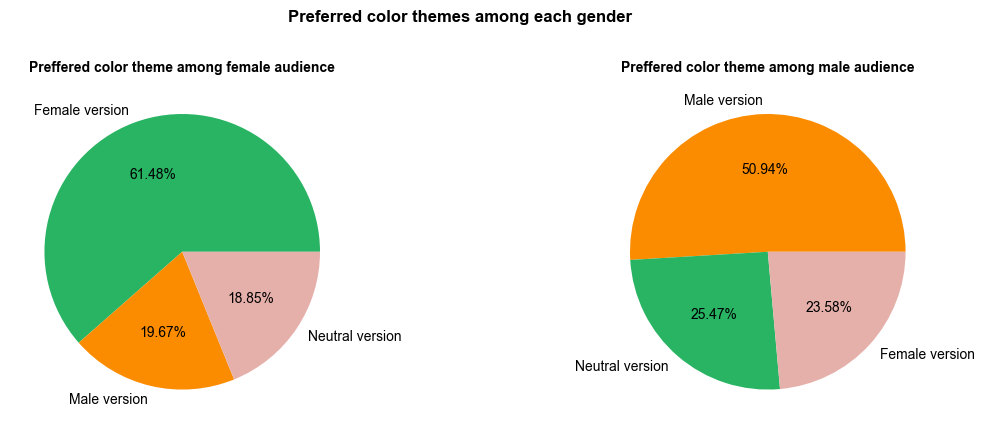

In [29]:
# Visualization of preffered color themes among each gender
female_color_values = female_preferences['Version with best color theme'].value_counts()
male_color_values = male_preferences['Version with best color theme'].value_counts()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.pie(female_color_values, labels=female_color_values.index, autopct='%1.2f%%', colors=['#28B463', '#FB8C00', '#E6B0AA'])
ax1.set_title('Preffered color theme among female audience', fontsize=10, fontweight='bold')

ax2.pie(male_color_values, labels=male_color_values.index, autopct='%1.2f%%', colors=['#FB8C00', '#28B463', '#E6B0AA'])
ax2.set_title('Preffered color theme among male audience', fontsize=10, fontweight='bold')

fig.suptitle('Preferred color themes among each gender', fontsize=12, fontweight='bold')
fig.subplots_adjust(wspace=0.7)

plt.show()

- Gendered ratings

In [30]:
# Collect ratings
m_color_m = male_preferences['Male version color theme rating'].value_counts()
f_color_m = male_preferences['Female version color theme rating'].value_counts()
n_color_m = male_preferences['Neutral version color theme rating'].value_counts()
m_color_f = female_preferences['Male version color theme rating'].value_counts()
f_color_f = female_preferences['Female version color theme rating'].value_counts()
n_color_f = female_preferences['Neutral version color theme rating'].value_counts()

# Sort them based on likert scale points (from 1 to 5) (reference: https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/)
m_color_m = [value for key, value in sorted(m_color_m.items())] # Keep only the value of the sorted key-value pairs
f_color_m = [value for key, value in sorted(f_color_m.items())]
n_color_m = [value for key, value in sorted(n_color_m.items())]
m_color_f = [value for key, value in sorted(m_color_f.items())]
f_color_f = [value for key, value in sorted(f_color_f.items())]
n_color_f = [value for key, value in sorted(n_color_f.items())]

# Convert each data list to list of percentages
m_color_m = np.array(m_color_m) / np.sum(m_color_m) * 100
f_color_m = np.array(f_color_m) / np.sum(f_color_m) * 100
n_color_m = np.array(n_color_m) / np.sum(n_color_m) * 100
m_color_f = np.array(m_color_f) / np.sum(m_color_f) * 100
f_color_f = np.array(f_color_f) / np.sum(f_color_f) * 100
n_color_f = np.array(n_color_f) / np.sum(n_color_f) * 100

# Create a dictionary
results_color = {
    'Male version color theme rating (from male audience)': m_color_m.tolist(),
    'Male version color theme rating (from female audience)': m_color_f.tolist(),
    'Female version color theme rating (from male audience)': f_color_m.tolist(),
    'Female version color theme rating (from female audience)': f_color_f.tolist(),
    'Neutral version color theme rating (from male audience)': n_color_m.tolist(),
    'Neutral version color theme rating (from female audience)': n_color_f.tolist(),
}

In [31]:
# Convert results to a dataframe
color_ratings_table = pd.DataFrame(results_color)
color_ratings_table.insert(0, 'Rating', category_names) # Insert likert points
color_ratings_table

,Rating,Male version color theme rating (from male audience),Male version color theme rating (from female audience),Female version color theme rating (from male audience),Female version color theme rating (from female audience),Neutral version color theme rating (from male audience),Neutral version color theme rating (from female audience)
0,I dislike it,3.773585,9.836066,2.830189,1.639344,4.716981,9.836066
1,I like it a little,24.528302,25.409836,22.641509,8.196721,22.641509,26.229508
2,I quite like it,27.358491,27.868852,46.226415,23.770492,38.679245,24.590164
3,I like it a lot,25.471698,27.049180,21.698113,34.426230,29.245283,32.786885
4,I like it very much,18.867925,9.836066,6.603774,31.967213,4.716981,6.557377


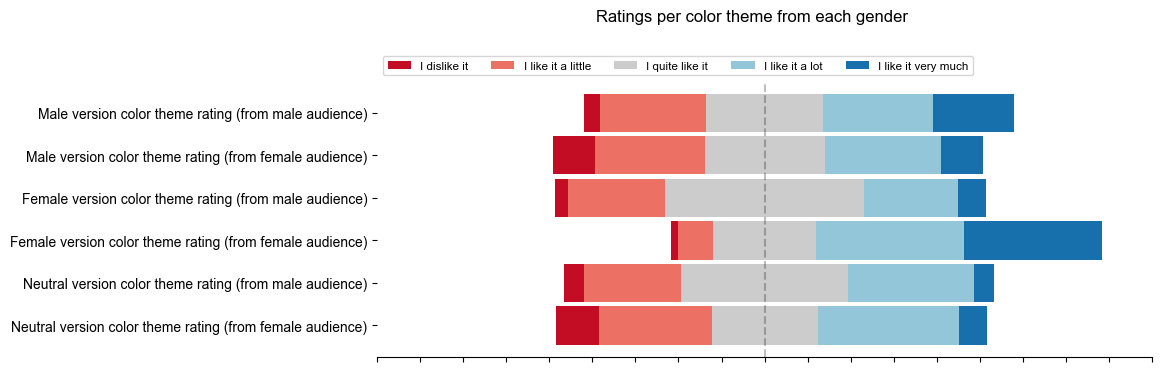

In [32]:
# Plot results
fig, ax = survey(results_color, category_names, 'Ratings per color theme from each gender')
fig.subplots_adjust(top=0.8)
fig.set_size_inches(10, 4)
plt.show()

<h4 style="font-weight: bold;">C. Overall ratings for each version's color theme</h4>

In [33]:
# Collect ratings
m_color = data['Male version color theme rating'].value_counts()
f_color = data['Female version color theme rating'].value_counts()
n_color = data['Neutral version color theme rating'].value_counts()

# Sort them based on likert scale points (from 1 to 5) (reference: https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/)
m_color = [value for key, value in sorted(m_color.items())] # Keep only the value of the sorted key-value pairs
f_color = [value for key, value in sorted(f_color.items())]
n_color = [value for key, value in sorted(n_color.items())]

# Convert each data list to list of percentages
m_color = np.array(m_color) / np.sum(m_color) * 100
f_color = np.array(f_color) / np.sum(f_color) * 100
n_color = np.array(n_color) / np.sum(n_color) * 100

# Create a dictionary
results_color = {
    'Male version color theme rating': m_color.tolist(),
    'Female version color theme rating': f_color.tolist(),
    'Neutral version color theme rating': n_color.tolist()
}

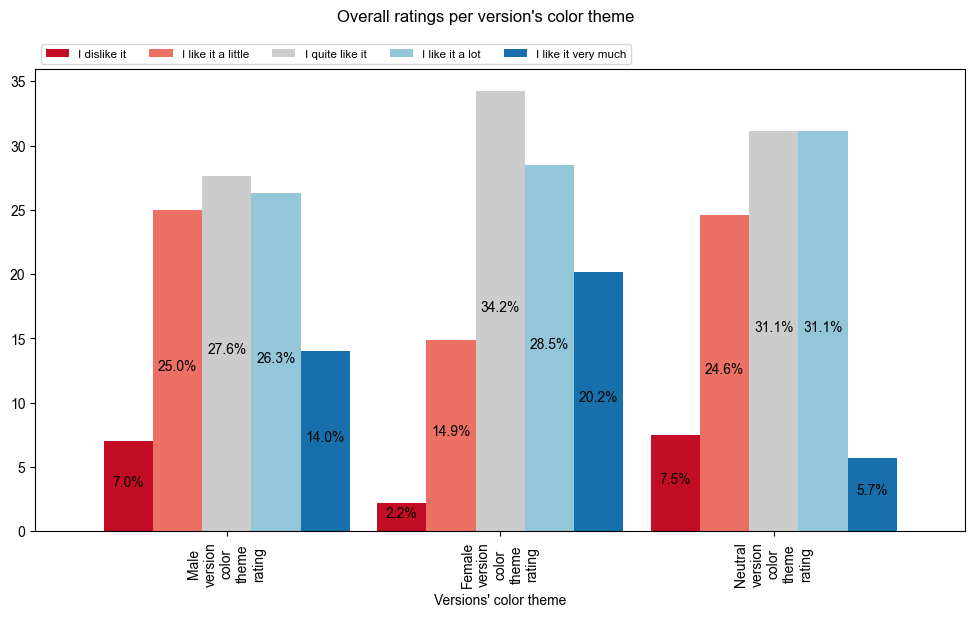

In [34]:
# Collect data to a dtaframe
color_ratings = pd.DataFrame([['Male version color theme rating'] + np.round(m_color, 1).tolist(), ['Female version color theme rating'] + np.round(f_color, 1).tolist(), ['Neutral version color theme rating'] + np.round(n_color, 1).tolist()],
                  columns=['Versions\' color theme'] + category_names)


# Create the figure with the subplots
fig, ax = plt.subplots()  


# Plot
color_ratings.plot(x='Versions\' color theme',
        kind='bar',
        stacked=False,
        ax=ax, 
        width = 0.9,
        color=["#c30d24", "#EC7063", "#cccccc", "#94c6da", "#1770ab"])

# Plot styling
plt.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small') # Place legend in correct  position
fig.set_facecolor('#FFFFFF')
fig.suptitle('Overall ratings per version\'s color theme')
fig.set_size_inches(12, 6)
ax.set_xticklabels(textwrap.fill(v_c_title, width=10) for v_c_title in color_ratings['Versions\' color theme']) # Wrap versions' color theme titles (reference: https://docs.python.org/3/library/textwrap.html#textwrap.fill)

# Add percentages (reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)
for bar in ax.patches:
    x, y = bar.get_xy() # Left bottom coords
    percentage = f'{bar.get_height()}%' # Make percentage as a string
    ax.annotate(percentage, (x + bar.get_width() / 2, y + bar.get_height() / 2), ha='center') # Place percentage in the correct position

# Show plot
plt.show()

<h3 style="font-weight: bold;">Preference analysis regarding rounded and sharp edges</h3>

<h4 style="font-weight: bold;">A. Overall edges preferences (despite gender)</h4>

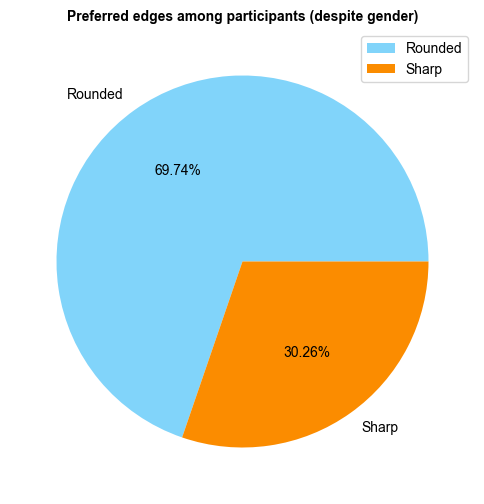

In [35]:
# Visualization of edge preference among all participants (males and females)
values = data['Rounded/sharp edges preference'].value_counts()

plt.figure(figsize=(6, 7))
plt.pie(values, labels=values.index, autopct='%1.2f%%', colors=['#81D4FA', '#FB8C00'])
plt.title('Preferred edges among participants (despite gender)', fontsize=10, fontweight='bold')
plt.legend(loc='upper right')
plt.show()

<h4 style="font-weight: bold;">B. Gendered edges preferences</h4>

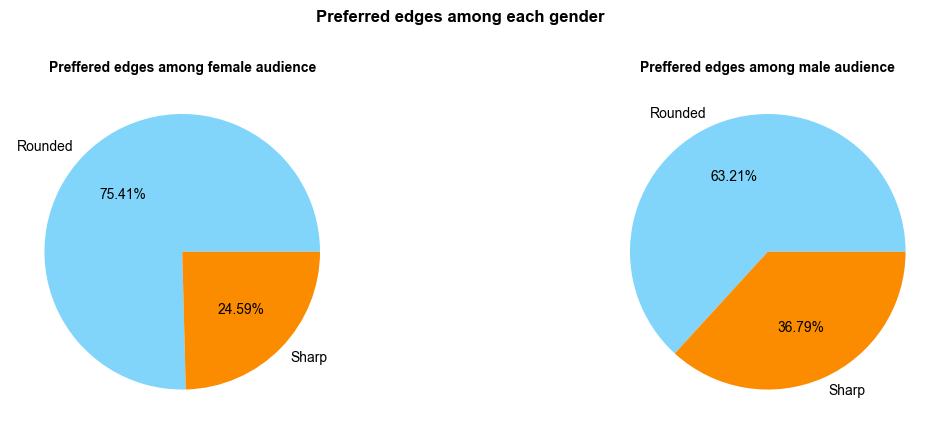

In [36]:
# Visualization of preffered edges among each gender
female_edges_values = female_preferences['Rounded/sharp edges preference'].value_counts()
male_edges_values = male_preferences['Rounded/sharp edges preference'].value_counts()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.pie(female_edges_values, labels=female_edges_values.index, autopct='%1.2f%%', colors=['#81D4FA', '#FB8C00'])
ax1.set_title('Preffered edges among female audience', fontsize=10, fontweight='bold')

ax2.pie(male_edges_values, labels=male_edges_values.index, autopct='%1.2f%%', colors=['#81D4FA', '#FB8C00'])
ax2.set_title('Preffered edges among male audience', fontsize=10, fontweight='bold')

fig.suptitle('Preferred edges among each gender', fontsize=12, fontweight='bold')
fig.subplots_adjust(wspace=0.7)

plt.show()

<h3 style="font-weight: bold;">Preference analysis regarding fonts</h3>

<h4 style="font-weight: bold;">A. Overall font preferences (despite gender)</h4>

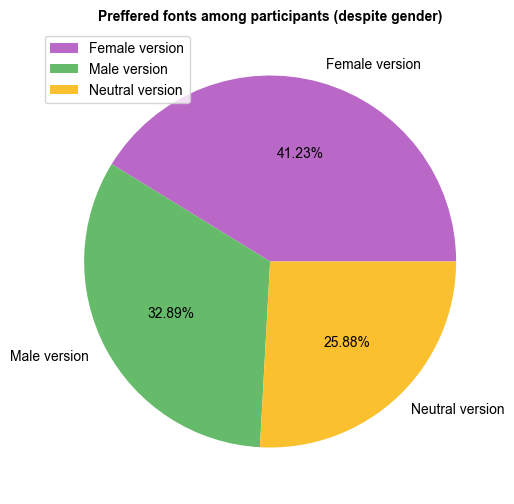

In [37]:
# Visualization of preffered font theme among all participants (males and females)
values = data['Version with best font'].value_counts()

plt.figure(figsize=(6, 7))
plt.pie(values, labels=values.index, autopct='%1.2f%%', colors=['#BA68C8', '#66BB6A', '#FBC02D'])
plt.title('Preffered fonts among participants (despite gender)', fontsize=10, fontweight='bold')
plt.legend(loc='upper left')
plt.show()

<h4 style="font-weight: bold;">B. Gendered font preferences and ratings</h4>

- Gendered preferences

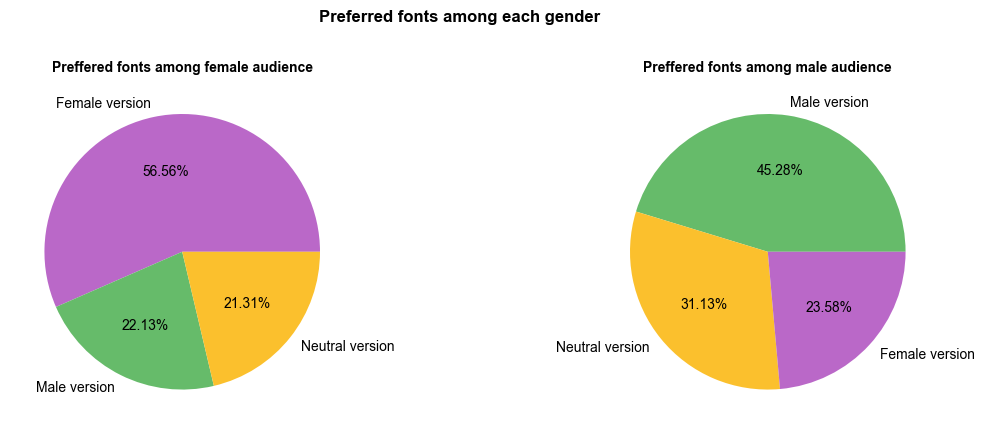

In [38]:
# Visualization of preffered font themes among each gender
female_font_values = female_preferences['Version with best font'].value_counts()
male_font_values = male_preferences['Version with best font'].value_counts()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.pie(female_font_values, labels=female_font_values.index, autopct='%1.2f%%', colors=['#BA68C8', '#66BB6A', '#FBC02D'])
ax1.set_title('Preffered fonts among female audience', fontsize=10, fontweight='bold')

ax2.pie(male_font_values, labels=male_font_values.index, autopct='%1.2f%%', colors=['#66BB6A','#FBC02D', '#BA68C8'])
ax2.set_title('Preffered fonts among male audience', fontsize=10, fontweight='bold')

fig.suptitle('Preferred fonts among each gender', fontsize=12, fontweight='bold')
fig.subplots_adjust(wspace=0.7)

plt.show()

- Gendered ratings

In [39]:
# Collect ratings
m_font_m = male_preferences['Male version font rating'].value_counts()
f_font_m = male_preferences['Female version font rating'].value_counts()
n_font_m = male_preferences['Neutral version font rating'].value_counts()
m_font_f = female_preferences['Male version font rating'].value_counts()
f_font_f = female_preferences['Female version font rating'].value_counts()
n_font_f = female_preferences['Neutral version font rating'].value_counts()

# Sort them based on likert scale points (from 1 to 5) (reference: https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/)
m_font_m = [value for key, value in sorted(m_font_m.items())] # Keep only the value of the sorted key-value pairs
f_font_m = [value for key, value in sorted(f_font_m.items())]
n_font_m = [value for key, value in sorted(n_font_m.items())]
m_font_f = [value for key, value in sorted(m_font_f.items())]
f_font_f = [value for key, value in sorted(f_font_f.items())]
n_font_f = [value for key, value in sorted(n_font_f.items())]

# Convert each data list to list of percentages
m_font_m = np.array(m_font_m) / np.sum(m_font_m) * 100
f_font_m = np.array(f_font_m) / np.sum(f_font_m) * 100
n_font_m = np.array(n_font_m) / np.sum(n_font_m) * 100
m_font_f = np.array(m_font_f) / np.sum(m_font_f) * 100
f_font_f = np.array(f_font_f) / np.sum(f_font_f) * 100
n_font_f = np.array(n_font_f) / np.sum(n_font_f) * 100

# Create a dictionary
results_font = {
    'Male version font rating (from male audience)': m_font_m.tolist(),
    'Male version font rating (from female audience)': m_font_f.tolist(),
    'Female version font rating (from male audience)': f_font_m.tolist(),
    'Female version font rating (from female audience)': f_font_f.tolist(),
    'Neutral version font rating (from male audience)': n_font_m.tolist(),
    'Neutral version font rating (from female audience)': n_font_f.tolist(),
}

In [40]:
# Convert results to a dataframe
font_ratings_table = pd.DataFrame(results_font)
font_ratings_table.insert(0, 'Rating', category_names) # Insert likert points
font_ratings_table

,Rating,Male version font rating (from male audience),Male version font rating (from female audience),Female version font rating (from male audience),Female version font rating (from female audience),Neutral version font rating (from male audience),Neutral version font rating (from female audience)
0,I dislike it,0.943396,9.016393,6.603774,1.639344,1.886792,6.557377
1,I like it a little,22.641509,18.032787,16.037736,11.475410,23.584906,18.852459
2,I quite like it,32.075472,27.868852,41.509434,18.852459,32.075472,33.606557
3,I like it a lot,28.301887,32.786885,27.358491,40.163934,32.075472,29.508197
4,I like it very much,16.037736,12.295082,8.490566,27.868852,10.377358,11.475410


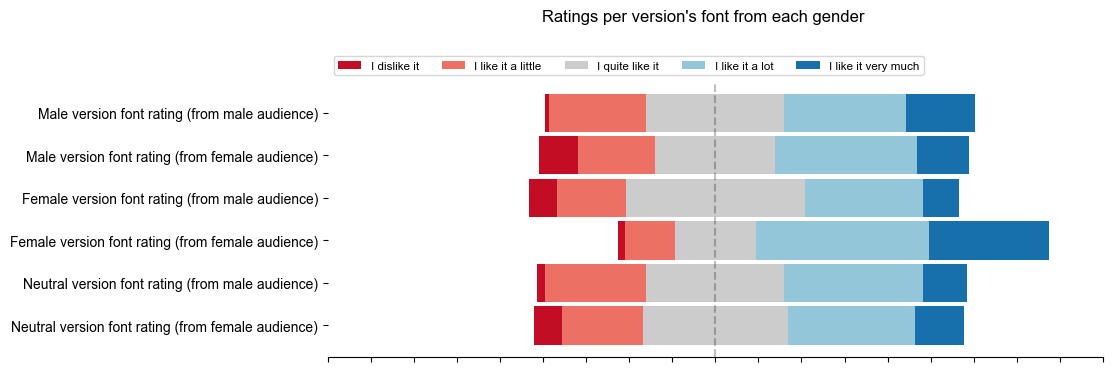

In [41]:
# Plot results
fig, ax = survey(results_font, category_names, 'Ratings per version\'s font from each gender')
fig.subplots_adjust(top=0.8)
fig.set_size_inches(10, 4)
plt.show()

<h4 style="font-weight: bold;">C. Font legibility ratings</h4>

- Overall legibility rating

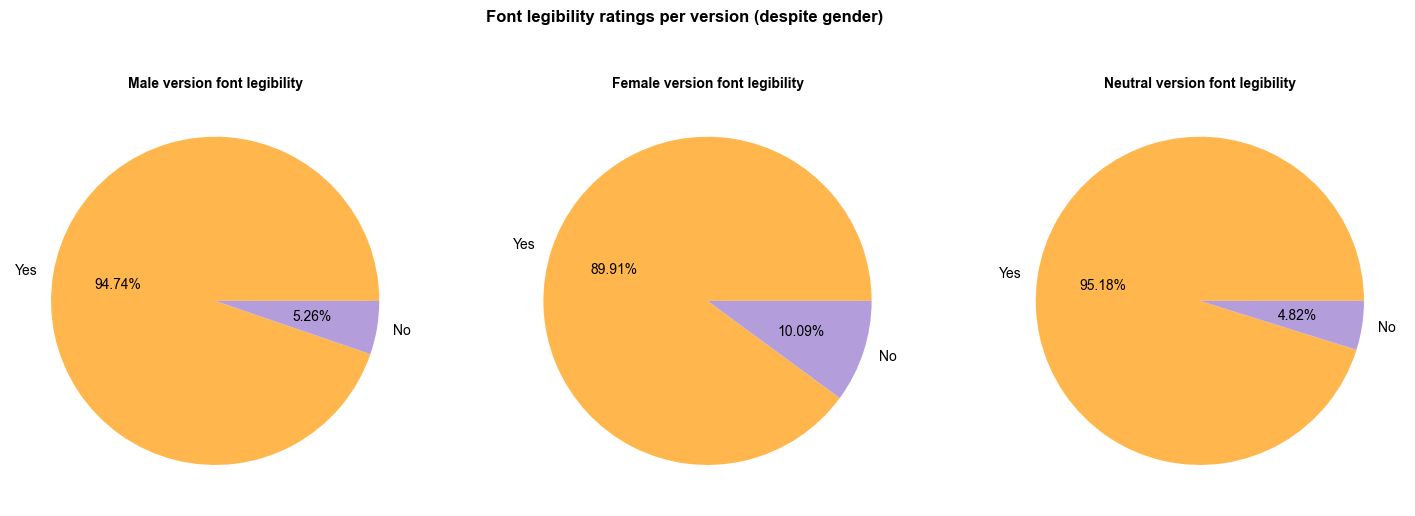

In [42]:
# Visualization of legibility ratings per font theme, among all participants (males and females)
leg_values_m = data['Male version font legibility'].value_counts()
leg_values_f = data['Female version font legibility'].value_counts()
leg_values_n = data['Neutral version font legibility'].value_counts()

fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

ax1.pie(leg_values_m, labels=leg_values_m.index, autopct='%1.2f%%', colors=['#FFB74D', '#B39DDB'])
ax1.set_title('Male version font legibility', fontsize=10, fontweight='bold')

ax2.pie(leg_values_f, labels=leg_values_f.index, autopct='%1.2f%%', colors=['#FFB74D', '#B39DDB'])
ax2.set_title('Female version font legibility', fontsize=10, fontweight='bold')

ax3.pie(leg_values_n, labels=leg_values_n.index, autopct='%1.2f%%', colors=['#FFB74D', '#B39DDB'])
ax3.set_title('Neutral version font legibility', fontsize=10, fontweight='bold')

fig.suptitle('Font legibility ratings per version (despite gender)', fontsize=12, fontweight='bold')

plt.show()

- Gendered legibility rating

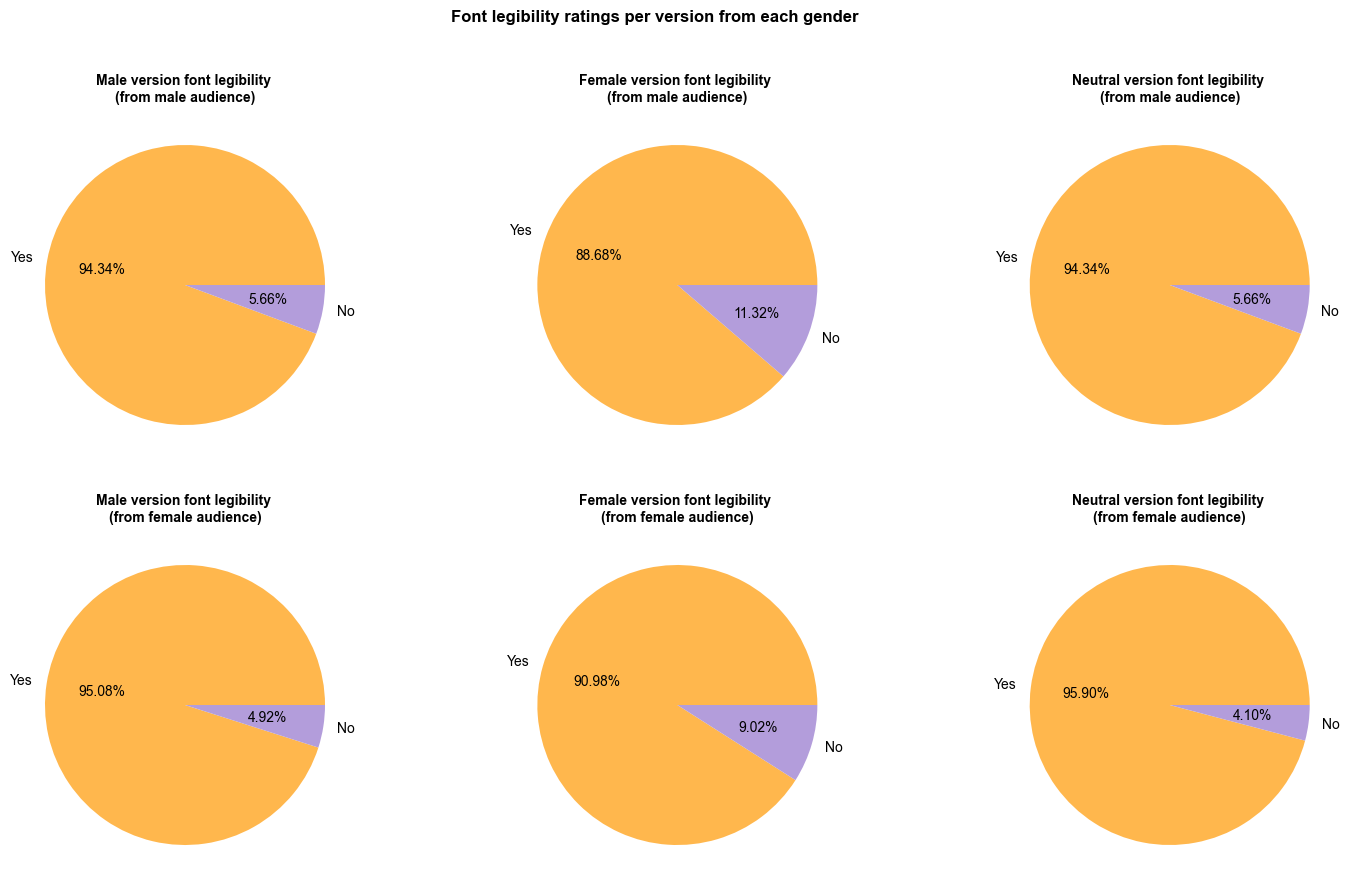

In [43]:
# Visualization of legibility ratings per font theme, among each gender
# Data from male audience
m_leg_values_m = male_preferences['Male version font legibility'].value_counts()
m_leg_values_f = male_preferences['Female version font legibility'].value_counts()
m_leg_values_n = male_preferences['Neutral version font legibility'].value_counts()

# Data from female audience
f_leg_values_m = female_preferences['Male version font legibility'].value_counts()
f_leg_values_f = female_preferences['Female version font legibility'].value_counts()
f_leg_values_n = female_preferences['Neutral version font legibility'].value_counts()

# Create figure
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18,10))

# Plot every pie
ax1.pie(m_leg_values_m, labels=m_leg_values_m.index, autopct='%1.2f%%', colors=['#FFB74D', '#B39DDB'])
ax1.set_title('Male version font legibility \n(from male audience)', fontsize=10, fontweight='bold')

ax2.pie(m_leg_values_f, labels=m_leg_values_f.index, autopct='%1.2f%%', colors=['#FFB74D', '#B39DDB'])
ax2.set_title('Female version font legibility \n(from male audience)', fontsize=10, fontweight='bold')

ax3.pie(m_leg_values_n, labels=m_leg_values_n.index, autopct='%1.2f%%', colors=['#FFB74D', '#B39DDB'])
ax3.set_title('Neutral version font legibility \n(from male audience)', fontsize=10, fontweight='bold')

ax4.pie(f_leg_values_m, labels=f_leg_values_m.index, autopct='%1.2f%%', colors=['#FFB74D', '#B39DDB'])
ax4.set_title('Male version font legibility \n(from female audience)', fontsize=10, fontweight='bold')

ax5.pie(f_leg_values_f, labels=f_leg_values_f.index, autopct='%1.2f%%', colors=['#FFB74D', '#B39DDB'])
ax5.set_title('Female version font legibility \n(from female audience)', fontsize=10, fontweight='bold')

ax6.pie(f_leg_values_n, labels=f_leg_values_n.index, autopct='%1.2f%%', colors=['#FFB74D', '#B39DDB'])
ax6.set_title('Neutral version font legibility \n(from female audience)', fontsize=10, fontweight='bold')

# Set figure title
fig.suptitle('Font legibility ratings per version from each gender', fontsize=12, fontweight='bold')

plt.show()

<h4 style="font-weight: bold;">D. Overall font ratings per version</h4>

In [44]:
# Collect ratings
m_font = data['Male version font rating'].value_counts()
f_font = data['Female version font rating'].value_counts()
n_font = data['Neutral version color theme rating'].value_counts()

# Sort them based on likert scale points (from 1 to 5) (reference: https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/)
m_font = [value for key, value in sorted(m_font.items())] # Keep only the value of the sorted key-value pairs
f_font = [value for key, value in sorted(f_font.items())]
n_font = [value for key, value in sorted(n_font.items())]

# Convert each data list to list of percentages
m_font = np.array(m_font) / np.sum(m_font) * 100
f_font = np.array(f_font) / np.sum(f_font) * 100
n_font = np.array(n_font) / np.sum(n_font) * 100

# Create a dictionary
results_color = {
    'Male version font rating': m_font.tolist(),
    'Female version font rating': f_font.tolist(),
    'Neutral version font rating': n_font.tolist()
}

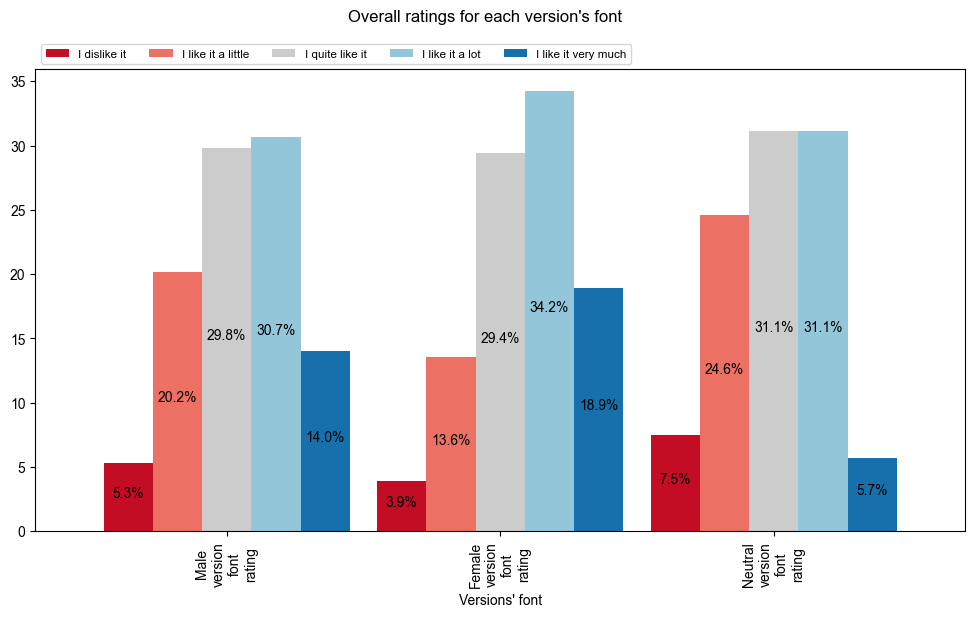

In [45]:
# Collect data to a dataframe
font_ratings = pd.DataFrame([['Male version font rating'] + np.round(m_font, 1).tolist(), ['Female version font rating'] + np.round(f_font, 1).tolist(), ['Neutral version font rating'] + np.round(n_font, 1).tolist()],
                  columns=['Versions\' font'] + category_names)


# Create the figure with the subplots
fig, ax = plt.subplots()  


# Plot
font_ratings.plot(x='Versions\' font',
        kind='bar',
        stacked=False,
        ax=ax, 
        width = 0.9,
        color=["#c30d24", "#EC7063", "#cccccc", "#94c6da", "#1770ab"])

# Plot styling
plt.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small') # Place legend in correct  position
fig.set_facecolor('#FFFFFF')
fig.suptitle('Overall ratings for each version\'s font')
fig.set_size_inches(12, 6)
ax.set_xticklabels(textwrap.fill(v_f_title, width=10) for v_f_title in font_ratings['Versions\' font']) # Wrap version titles (reference: https://docs.python.org/3/library/textwrap.html#textwrap.fill)

# Add percentages (reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)
for bar in ax.patches:
    x, y = bar.get_xy() # Left bottom coords
    percentage = f'{bar.get_height()}%' # Make percentage as a string
    ax.annotate(percentage, (x + bar.get_width() / 2, y + bar.get_height() / 2), ha='center') # Place percentage in the correct position

# Show plot
plt.show()

<h3 style="font-weight: bold;">Preferences regarding images and videos</h3>

<h4 style="font-weight: bold;">A. Images/videos preferences</h4>

- Overall preferences despite gender

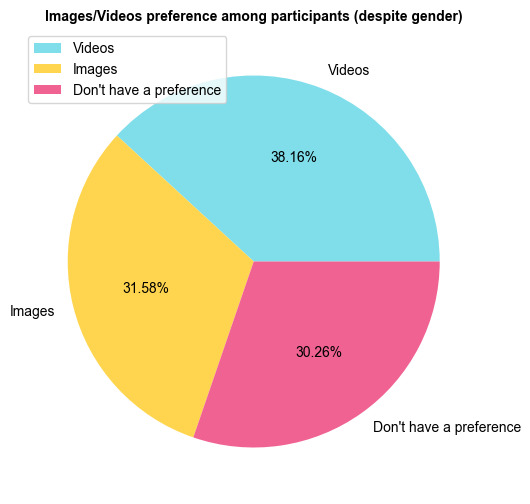

In [46]:
# Visualization of preferences for images/videos among all participants (males and females)
values = data['Images/videos preference'].value_counts()

plt.figure(figsize=(6, 7))
plt.pie(values, labels=values.index, autopct='%1.2f%%', colors=['#80DEEA', '#FFD54F', '#F06292'])
plt.title('Images/Videos preference among participants (despite gender)', fontsize=10, fontweight='bold')
plt.legend(loc='upper left')
plt.show()

- Gendered preferences

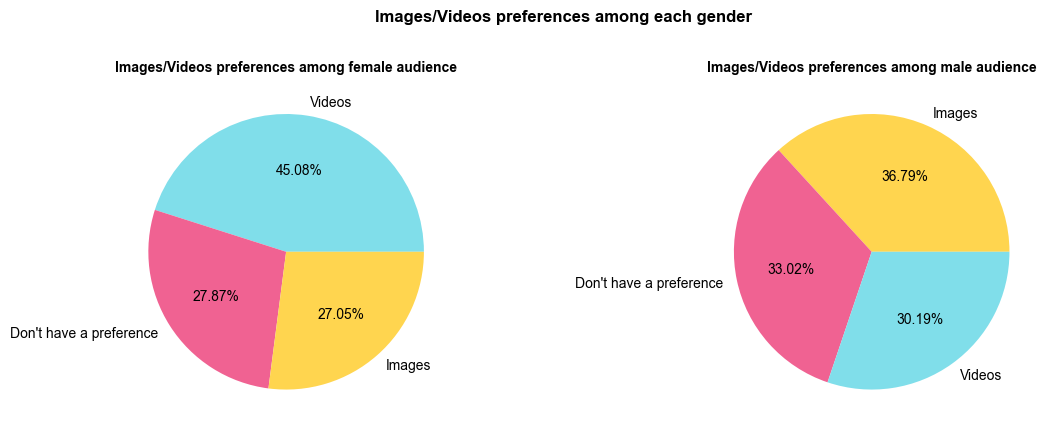

In [47]:
# Visualization of preferences for images/videos among each gender
female_values = female_preferences['Images/videos preference'].value_counts()
male_values = male_preferences['Images/videos preference'].value_counts()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.pie(female_values, labels=female_values.index, autopct='%1.2f%%', colors=['#80DEEA','#F06292', '#FFD54F'])
ax1.set_title('Images/Videos preferences among female audience', fontsize=10, fontweight='bold')

ax2.pie(male_values, labels=male_values.index, autopct='%1.2f%%', colors=['#FFD54F', '#F06292', '#80DEEA'])
ax2.set_title('Images/Videos preferences among male audience', fontsize=10, fontweight='bold')

fig.suptitle('Images/Videos preferences among each gender', fontsize=12, fontweight='bold')
fig.subplots_adjust(wspace=0.7)

plt.show()

<h4 style="font-weight: bold;">B. Version with best images/videos based on participants' gender</h4>

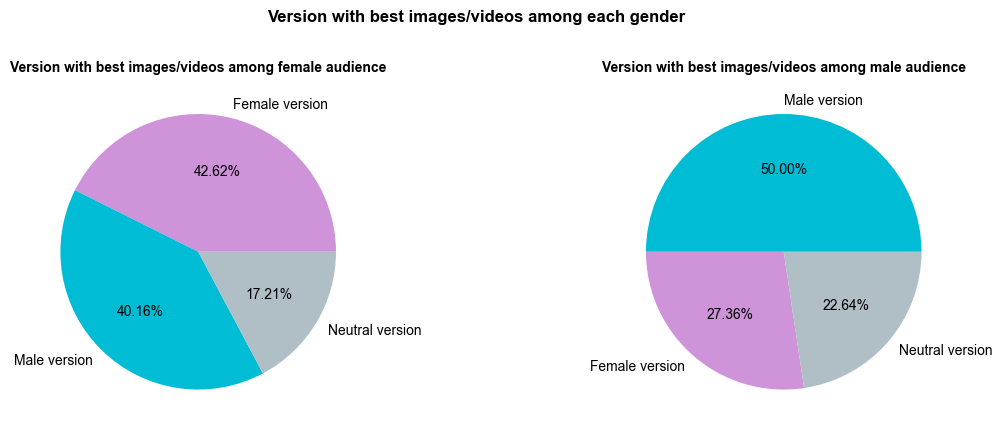

In [48]:
# Visualization of best version's images/videos among each gender
female_values = female_preferences['Version with best images/videos'].value_counts()
male_values = male_preferences['Version with best images/videos'].value_counts()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.pie(female_values, labels=female_values.index, autopct='%1.2f%%', colors=['#CE93D8','#00BCD4', '#B0BEC5'])
ax1.set_title('Version with best images/videos among female audience', fontsize=10, fontweight='bold')

ax2.pie(male_values, labels=male_values.index, autopct='%1.2f%%', colors=['#00BCD4', '#CE93D8', '#B0BEC5'])
ax2.set_title('Version with best images/videos among male audience', fontsize=10, fontweight='bold')

fig.suptitle('Version with best images/videos among each gender', fontsize=12, fontweight='bold')
fig.subplots_adjust(wspace=0.7)

plt.show()

<h4 style="font-weight: bold;">C. Overwhelmed by videos</h4>

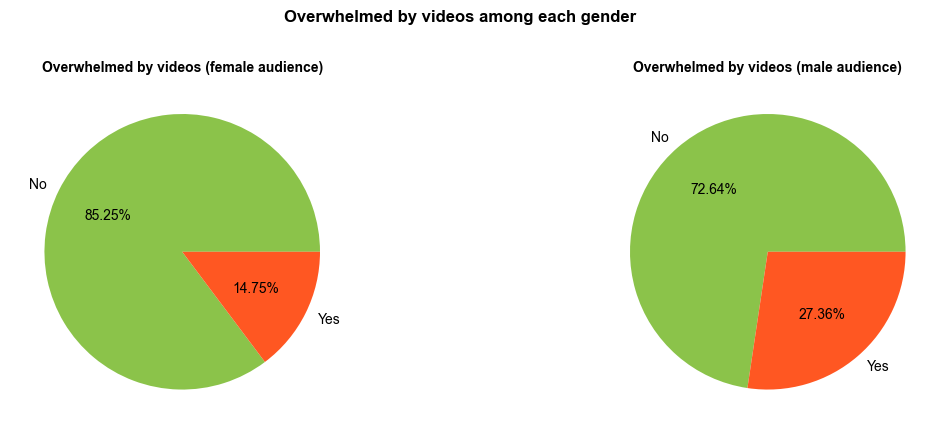

In [49]:
# Was each gender overwhelmed by the videos used? 
female_values = female_preferences['Overwhelmed by videos'].value_counts()
male_values = male_preferences['Overwhelmed by videos'].value_counts()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.pie(female_values, labels=female_values.index, autopct='%1.2f%%', colors=['#8BC34A','#FF5722'])
ax1.set_title('Overwhelmed by videos (female audience)', fontsize=10, fontweight='bold')

ax2.pie(male_values, labels=male_values.index, autopct='%1.2f%%', colors=['#8BC34A', '#FF5722'])
ax2.set_title('Overwhelmed by videos (male audience)', fontsize=10, fontweight='bold')

fig.suptitle('Overwhelmed by videos among each gender', fontsize=12, fontweight='bold')
fig.subplots_adjust(wspace=0.7)

plt.show()

<h3 style="font-weight: bold;">Usability ratings</h3>

<h4 style="font-weight: bold;">A. Gendered usability ratings per version</h4>

In [50]:
# Collect ratings
m_use_m = male_preferences['Male version usability rating'].value_counts()
f_use_m = male_preferences['Female version usability rating'].value_counts()
n_use_m = male_preferences['Neutral version usability rating'].value_counts()
m_use_f = female_preferences['Male version usability rating'].value_counts()
f_use_f = female_preferences['Female version usability rating'].value_counts()
n_use_f = female_preferences['Neutral version usability rating'].value_counts()

# Sort them based on likert scale points (from 1 to 5) (reference: https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/)
m_use_m = [value for key, value in sorted(m_use_m.items())] # Keep only the value of the sorted key-value pairs
f_use_m = [value for key, value in sorted(f_use_m.items())]
n_use_m = [value for key, value in sorted(n_use_m.items())]
m_use_f = [value for key, value in sorted(m_use_f.items())]
f_use_f = [value for key, value in sorted(f_use_f.items())]
n_use_f = [value for key, value in sorted(n_use_f.items())]

# Convert each data list to list of percentages
m_use_m = np.array(m_use_m) / np.sum(m_use_m) * 100
f_use_m = np.array(f_use_m) / np.sum(f_use_m) * 100
n_use_m = np.array(n_use_m) / np.sum(n_use_m) * 100
m_use_f = np.array(m_use_f) / np.sum(m_use_f) * 100
f_use_f = np.array(f_use_f) / np.sum(f_use_f) * 100
n_use_f = np.array(n_use_f) / np.sum(n_use_f) * 100

# Create a dictionary
results_usability = {
    'Male version usability rating (from male audience)': m_use_m.tolist(),
    'Male version usability rating (from female audience)': m_use_f.tolist(),
    'Female version usability rating (from male audience)': f_use_m.tolist(),
    'Female version usability rating (from female audience)': f_use_f.tolist(),
    'Neutral version usability rating (from male audience)': n_use_m.tolist(),
    'Neutral version usability rating (from female audience)': n_use_f.tolist(),
}

In [51]:
# Set likert scale labels
usability_labels = ['Not usable', 'A little usable', 'Quite usable', 'Very usable', 'Highly usable']

# Convert results to a dataframe
usability_ratings_table = pd.DataFrame(results_usability)
usability_ratings_table.insert(0, 'Rating', usability_labels)
usability_ratings_table

,Rating,Male version usability rating (from male audience),Male version usability rating (from female audience),Female version usability rating (from male audience),Female version usability rating (from female audience),Neutral version usability rating (from male audience),Neutral version usability rating (from female audience)
0,Not usable,0.943396,3.278689,1.886792,1.639344,1.886792,3.278689
1,A little usable,9.433962,10.655738,9.433962,6.557377,12.264151,10.655738
2,Quite usable,33.018868,31.147541,36.792453,26.229508,33.962264,27.049180
3,Very usable,34.905660,35.245902,33.018868,38.524590,31.132075,40.163934
4,Highly usable,21.698113,19.672131,18.867925,27.049180,20.754717,18.852459


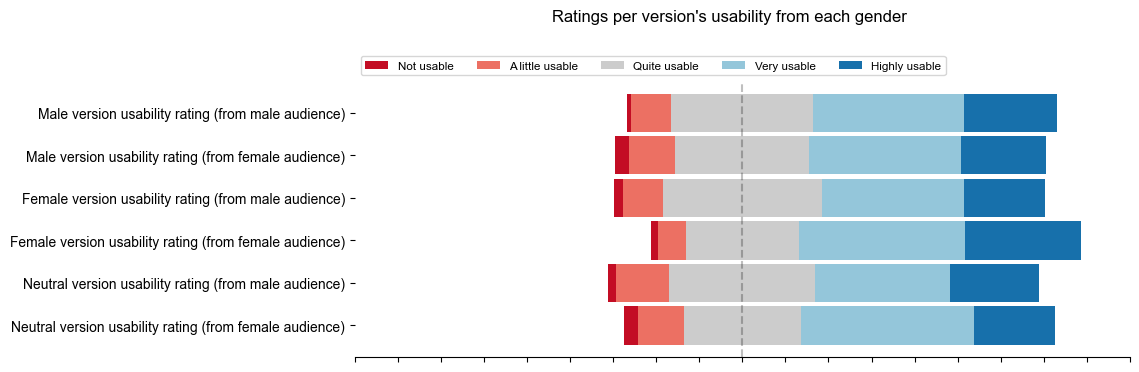

In [52]:
# Plot results
fig, ax = survey(results_usability, usability_labels, 'Ratings per version\'s usability from each gender')
fig.subplots_adjust(top=0.8)
fig.set_size_inches(10, 4)
plt.show()

<h4 style="font-weight: bold;">B. Overall usability ratings per version</h4>

In [53]:
# Collect ratings
m_use = data['Male version usability rating'].value_counts()
f_use = data['Female version usability rating'].value_counts()
n_use = data['Neutral version usability rating'].value_counts()

# Sort them based on likert scale points (from 1 to 5) (reference: https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/)
m_use = [value for key, value in sorted(m_use.items())] # Keep only the value of the sorted key-value pairs
f_use = [value for key, value in sorted(f_use.items())]
n_use = [value for key, value in sorted(n_use.items())]

# Convert each data list to list of percentages
m_use = np.array(m_use) / np.sum(m_use) * 100
f_use = np.array(f_use) / np.sum(f_use) * 100
n_use = np.array(n_use) / np.sum(n_use) * 100

# Create a dictionary
results_usability = {
    'Male version usability rating': m_use.tolist(),
    'Female version usability rating': f_use.tolist(),
    'Neutral version usability rating': n_use.tolist()
}

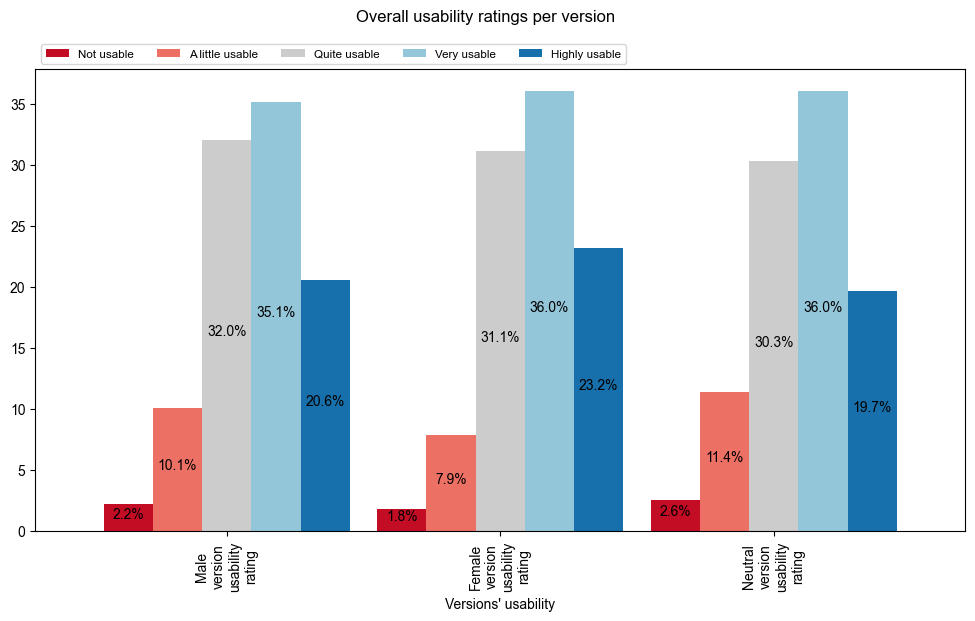

In [54]:
# Collect data to a dataframe
usability_ratings = pd.DataFrame([['Male version usability rating'] + np.round(m_use, 1).tolist(), ['Female version usability rating'] + np.round(f_use, 1).tolist(), ['Neutral version usability rating'] + np.round(n_use, 1).tolist()],
                  columns=['Versions\' usability'] + usability_labels)


# Create the figure with the subplots
fig, ax = plt.subplots()  


# Plot
usability_ratings.plot(x='Versions\' usability',
        kind='bar',
        stacked=False,
        ax=ax, 
        width = 0.9,
        color=["#c30d24", "#EC7063", "#cccccc", "#94c6da", "#1770ab"])

# Plot styling
plt.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small') # Place legend in correct  position
fig.set_facecolor('#FFFFFF')
fig.suptitle('Overall usability ratings per version')
fig.set_size_inches(12, 6)
ax.set_xticklabels(textwrap.fill(u_title, 10) for u_title in usability_ratings['Versions\' usability']) # Wrap version titles (reference: https://docs.python.org/3/library/textwrap.html#textwrap.fill)

# Add percentages (reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)
for bar in ax.patches:
    x, y = bar.get_xy() # Left bottom coords
    percentage = f'{bar.get_height()}%' # Make percentage as a string
    ax.annotate(percentage, (x + bar.get_width() / 2, y + bar.get_height() / 2), ha='center') # Place percentage in the correct position

# Show plot
plt.show()

<h3 style="font-weight: bold;">Target gender and version matching from group (groub b) which was not aware of the intended gender for each version</h3>

<h4 style="font-weight: bold;">A. Target gender and version matching from participants (despite gender)</h4>

In [55]:
# Participants from each group
data['Aware of gender target'].value_counts()

No     168
Yes     60
Name: Aware of gender target, dtype: int64

In [56]:
# Collect data from group b (which was not aware of the intended gender for each version)
group_b = data[data['Aware of gender target'] == 'No']

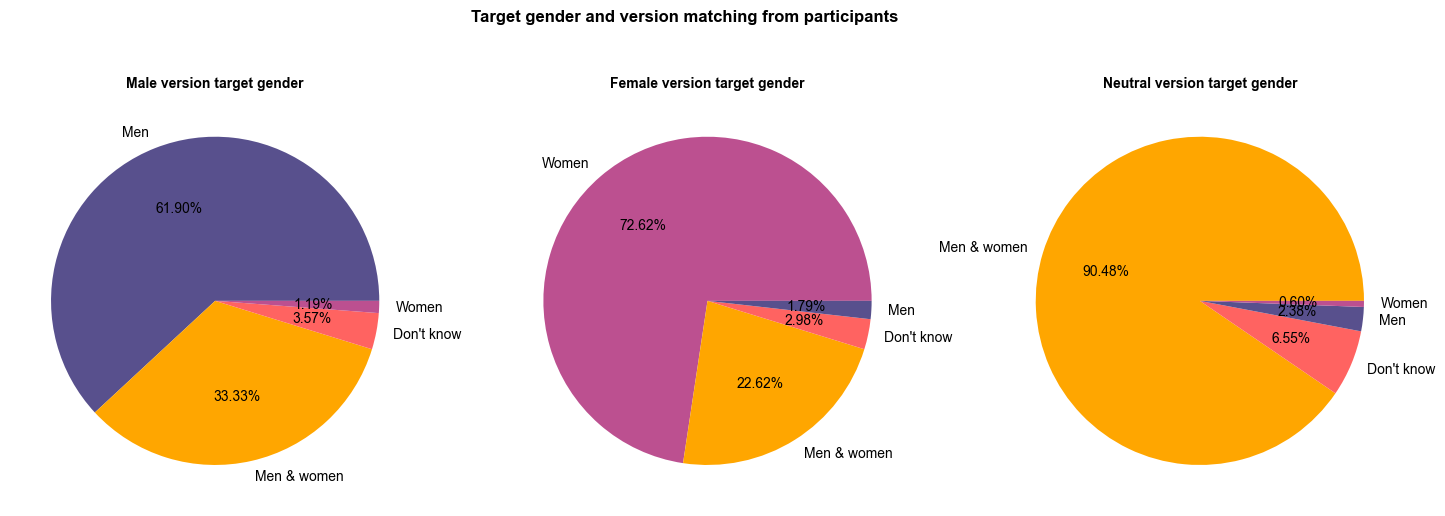

In [57]:
# Visualization of matching target gender and version
pair_values_m = group_b['Male version target market'].value_counts()
pair_values_f = group_b['Female version target market'].value_counts()
pair_values_n = group_b['Neutral version target market'].value_counts()

fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

ax1.pie(pair_values_m, labels=pair_values_m.index, autopct='%1.2f%%', colors=['#58508d','#ffa600', '#ff6361',  '#bc5090'])
ax1.set_title('Male version target gender', fontsize=10, fontweight='bold')

ax2.pie(pair_values_f, labels=pair_values_f.index, autopct='%1.2f%%', colors=[ '#bc5090', '#ffa600', '#ff6361', '#58508d'])
ax2.set_title('Female version target gender', fontsize=10, fontweight='bold')

ax3.pie(pair_values_n, labels=pair_values_n.index, autopct='%1.2f%%', colors=['#ffa600', '#ff6361', '#58508d', '#bc5090'])
ax3.set_title('Neutral version target gender', fontsize=10, fontweight='bold')

fig.suptitle('Target gender and version matching from participants', fontsize=12, fontweight='bold')

plt.show()

<h4 style="font-weight: bold;">B. Target gender and version matching from male and female audience</h4>

In [58]:
# Collect male and female preferences from group b
group_b_m = group_b[group_b['Gender'] != 'Male']
group_b_f = group_b[group_b['Gender'] != 'Female']

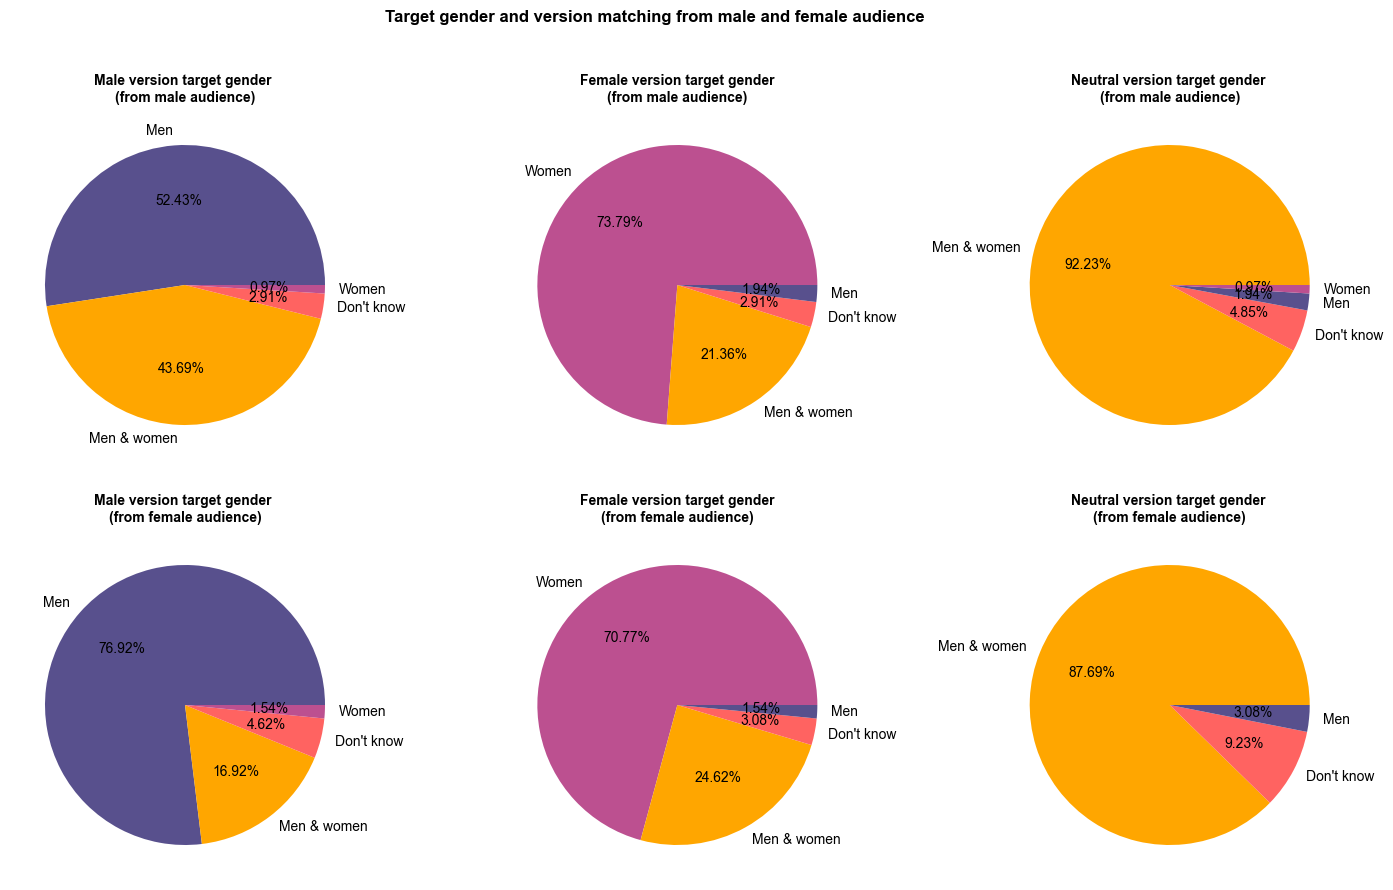

In [59]:
# Visualization of matching target gender and version from male and female audience
# Data from male audience
m_pair_values_m = group_b_m['Male version target market'].value_counts()
m_pair_values_f = group_b_m['Female version target market'].value_counts()
m_pair_values_n = group_b_m['Neutral version target market'].value_counts()

# Data from female audience
f_pair_values_m = group_b_f['Male version target market'].value_counts()
f_pair_values_f = group_b_f['Female version target market'].value_counts()
f_pair_values_n = group_b_f['Neutral version target market'].value_counts()

# Create figure
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18,10))

# Plot every pie
ax1.pie(m_pair_values_m, labels=m_pair_values_m.index, autopct='%1.2f%%', colors=['#58508d','#ffa600', '#ff6361',  '#bc5090'])
ax1.set_title('Male version target gender \n(from male audience)', fontsize=10, fontweight='bold')

ax2.pie(m_pair_values_f, labels=m_pair_values_f.index, autopct='%1.2f%%', colors=['#bc5090', '#ffa600', '#ff6361', '#58508d'])
ax2.set_title('Female version target gender\n(from male audience)', fontsize=10, fontweight='bold')

ax3.pie(m_pair_values_n, labels=m_pair_values_n.index, autopct='%1.2f%%', colors=['#ffa600', '#ff6361', '#58508d', '#bc5090'])
ax3.set_title('Neutral version target gender \n(from male audience)', fontsize=10, fontweight='bold')

ax4.pie(f_pair_values_m, labels=f_pair_values_m.index, autopct='%1.2f%%', colors=['#58508d','#ffa600', '#ff6361',  '#bc5090'])
ax4.set_title('Male version target gender \n(from female audience)', fontsize=10, fontweight='bold')

ax5.pie(f_pair_values_f, labels=f_pair_values_f.index, autopct='%1.2f%%', colors=['#bc5090', '#ffa600', '#ff6361', '#58508d'])
ax5.set_title('Female version target gender\n(from female audience)', fontsize=10, fontweight='bold')

ax6.pie(f_pair_values_n, labels=f_pair_values_n.index, autopct='%1.2f%%', colors=['#ffa600', '#ff6361', '#58508d', '#bc5090'])
ax6.set_title('Neutral version target gender \n(from female audience)', fontsize=10, fontweight='bold')

# Set figure title
fig.suptitle('Target gender and version matching from male and female audience', fontsize=12, fontweight='bold')

plt.show()

<h3 style="font-weight: bold;">Biased by awereness of gender target per version by group (group a) who was aware of the intended gender for each version</h3>

<h4 style="font-weight: bold;">A. Overall results (despite gender)</h4>

In [60]:
# Collect data from group a
group_a = data[data['Aware of gender target'] == 'Yes']

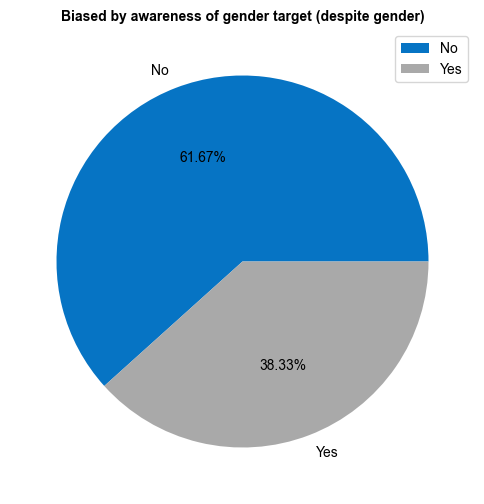

In [61]:
# Were participants of group a biased by the possesion of this information?
values = group_a['Biased by awareness of gender target'].value_counts()

plt.figure(figsize=(6, 7))
plt.pie(values, labels=values.index, autopct='%1.2f%%', colors=['#0674C4', '#A9A9A9'])
plt.title('Biased by awareness of gender target (despite gender)', fontsize=10, fontweight='bold')
plt.legend(loc='upper right')
plt.show()

<h4 style="font-weight: bold;">B. Gendered results</h4>

In [62]:
# Split female and male preferences in two different dataframes
group_a_f = group_a[group_a['Gender'] == 'Female']
group_a_m = group_a[group_a['Gender'] == 'Male']

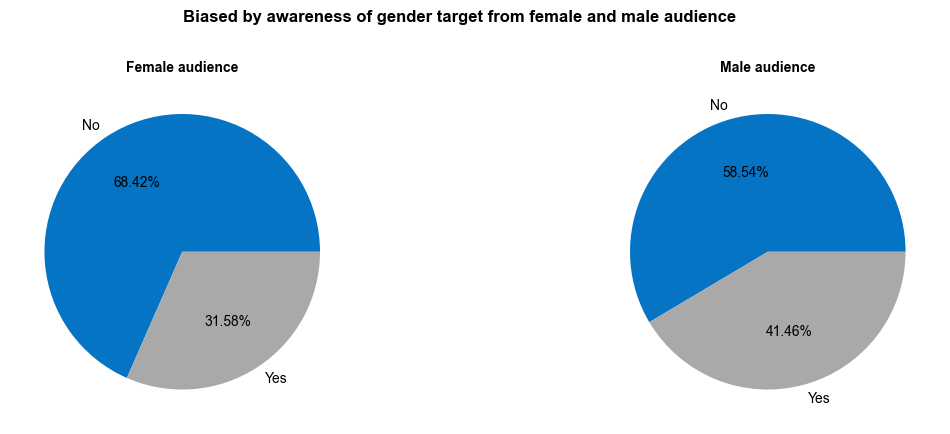

In [63]:
# Were participants among each gander biased by the possesion of this information (from group a)?
female_values = group_a_f['Biased by awareness of gender target'].value_counts()
male_values = group_a_m['Biased by awareness of gender target'].value_counts()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.pie(female_values, labels=female_values.index, autopct='%1.2f%%', colors=['#0674C4', '#A9A9A9'])
ax1.set_title('Female audience', fontsize=10, fontweight='bold')

ax2.pie(male_values, labels=male_values.index, autopct='%1.2f%%', colors=['#0674C4', '#A9A9A9'])
ax2.set_title('Male audience', fontsize=10, fontweight='bold')

fig.suptitle('Biased by awareness of gender target from female and male audience', fontsize=12, fontweight='bold')
fig.subplots_adjust(wspace=0.7)

plt.show()

<h3 style="font-weight: bold;">Comments from participants</h3>

In [64]:
# View paraticipants's comments regarding the three versions
comments = data[data['Comments'] != '-']
pd.set_option('display.max_colwidth', None)
comments[['Comments', 'Aware of gender target', 'Gender', 'Age']]

,Comments,Aware of gender target,Gender,Age
1,"Στην Α έκδοση θα μου άρεσε να είχε λίγο περισσότερο φως και στην Γ έκδοση θα μου άρεσε και ένα άλλο χρώμα μαζί με λευκό γιατί θυμίζει πολύ την Β έκδοση, που είναι εξαιρετική χρωματικά.",No,Female,51 - 65
3,"Η έκδοση Α έχει πολύ μεγάλα βίντεο στην που πιάνουν τα 2/3 της οθόνης, οπότε ενδέχεται να αποσπά τον χρήστη. Η έκδοση Β δεν έχει πολύ καλή αντίθεση χρωμάτων αλλά είναι η πιο όμορφη από όλες. Η έκδοση Γ είναι συνολικά αυτή που θα επέλεγα για την καλύτερη λειτουργικότητα, έχει καλή αντίθεση χρωμάτων και σωστή αναλογία εικόνων.",No,Male,18 - 30
11,"στην τρίτη εκδοση στο menu επαναλαμβάνεται το link About Flow,προτιμω το Menu της 2ης εκδοσης. Η πρώτη εκδοση είναι κουραστική στο μάτι",No,Female,41 - 50
13,"Οι σελίδες είναι πολύ εύχρηστες και ενδιαφέρουσες, ωστόσο δεν ξέρω κατά πόσο θα μου ήταν χρήσιμη μια τέτοια ιστοσελίδα στην καθημερινή μου ζωή. Τα εναλλασσόμενα μηνύματα-αποφθέγματα εξάπτουν την περιέργεια και οι εικόνες κάνουν την εμπειρία διασκεδαστική. Παρόλα αυτά, σε καμία ιστοσελίδα δεν με ικανοποίησαν απόλυτα τα χρώματα και κάθε σελίδα είχε κάτι διαφορετικό που να μου αρέσει (ίσως ένας συνδυασμός των χαρακτηριστικών της κάθε σελίδας με κάποια διαφορετική χρωματική παλέτα να με κάλυπτε ιδανικά, αλλά αυτό είναι προσωπική γνώμη). Γενικά, το αποτέλεσμα είναι επαγγελματικό και μπορεί ξεκάθαρα να προσελκύσει το γενικό κοινό. Ίσως και με κάποια πρόσθετη λειτουργικότητα και με τη συνοδεία μιας εφαρμογής στο κινητό να μπορεί να γίνει μεγάλη επιτυχία.",No,Female,18 - 30
17,"Η Έκδοση Α, αν και είναι dark και συνήθως προτιμώ αυτές τις χρωματικές παλέτες, έχει έντονο contrast και μετά από λίγη ώρα κουράζει τα μάτια. Επίσης Μου φέρνει στο μυαλό κάτι πιο ανδρικό, σπορ και δυναμικό.\nΗ Έκδοση Β αν και έχει παστέλ χρωματική παλέτα που απαιχθάνομαι, με χαλαρώνει και με κάνει να σταθώ πιο πολύ ώρα να πλοηγηθώ. Επίσης ενώ αποπνέει κάτι θηλυκό και ντελικάτο, που σε γενικές γραμμές δεν είναι του γούστου μου, είναι καλοσχεδιασμένη και η αραιή γραμματοσειρά βγάζει μία αίσθηση χαλάρωσης και διώχνει το στρες.Η έκδοση Γ, ενώ στην αρχή δε μου πολυάρεσε, στην πορεία με έκανε επίσης να χαλαρώσω λόγω της χρωματικής παλέτας της αλλά και του λιτού σχεδιασμού της.Σε γενικές γραμμές και οι 3 εκδόσεις μου άρεσαν, απλά η κάθε μία είναι κατάλληλη για να πλασάρει κάτι διαφορετικό.Συγχαρητήρια και για τις 3 Εκδόσεις και καλή επιτυχία!",No,Female,41 - 50
21,"Η πρώτη έκδοση είναι πολύ σκοτεινή, η δεύτερη είναι αρκετά χαλαρωτική και η τρίτη λόγω της έντονης κίνησης που περιέχουν τα βίντεο θεωρώ ότι είναι πολύ κουραστική.",No,Female,41 - 50
23,"Στη γυναικεία έκδοση ήταν πολύ αχνά και ουδέτερα τα χρώματα, στην αντρική υπονοεί δυναμισμό , ενώ στην ουδέτερη οι εικόνες θα μου άρεσαν περισσότερο καθαρές. Ωστόσο την προτιμώ από την γυναικέια λόγω του ότι είναι πιο έντονη η γραμματοσειρά",No,Female,41 - 50
34,Είναι όλα πολύ εύχρηστα και όμορφα,No,Female,18 - 30
37,Προσθηκη ήχου,No,Male,51 - 65
41,"Η Α έκδοση μου ήταν πιο κουραστική στο μάτι (σκούρο χρώμα) και μου δημιούργησε αίσθημα άγχους και αποφυγής της πλατφόρμας.\nΗ Β έκδοση ήταν σίγουρα πιο ξεκούραστη, τα χρώματα δίνουν ένα πιο ευχάριστο vibe, θέλεις να μπεις στη διαδικασία να σημειώσεις, να οργανωθείς και γενικότερα να συνεχιστεί η καθημερινή καταγραφή.\nΗ Γ έκδοση ήταν πιο βαρετή. Μοιάζει με το design του google calendar.",No,Female,18 - 30


<h4 style="font-weight: bold;">Welch's t-test: Statistical significant differencies in ratings from each gender (numeric data)</h4>

- Male version ratings

In [65]:
# Collect ratings from male version and convert them to a list (reference: https://www.geeksforgeeks.org/welchs-t-test-in-python/)
f = female_preferences['Male version rating'].tolist()
m = male_preferences['Male version rating'].tolist()

# Conduct Welch's t-Test and calculate t-statistic and p-value of data 
tstat, pvalue = scipy.stats.ttest_ind(f, m, equal_var = False)
res = {
        'Feature': ['Male version'],
        't-statistic': [tstat],
        'p-value': [pvalue]
      }

# Add results to a dataframe
ss = pd.DataFrame(res) # This dataframe will contain all results from conducted t-tests

- Female version general ratings

In [66]:
# Collect ratings from female version and convert them to a list (reference: https://www.geeksforgeeks.org/welchs-t-test-in-python/)
f = female_preferences['Female version rating'].tolist()
m = male_preferences['Female version rating'].tolist()

# Conduct Welch's t-Test and calculate t-statistic and p-value of data 
tstat, pvalue = scipy.stats.ttest_ind(f, m, equal_var = False)
res = {
        'Feature': ['Female version'],
        't-statistic': [tstat],
        'p-value': [pvalue]
      }

# Add results to the dataframe 
ss = pd.concat([ss, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Neutral version general ratings

In [67]:
# Collect ratings from neutral version and convert them to a list (reference: https://www.geeksforgeeks.org/welchs-t-test-in-python/)
f = female_preferences['Neutral version rating'].tolist()
m = male_preferences['Neutral version rating'].tolist()

# Conduct Welch's t-Test and calculate t-statistic and p-value of data 
tstat, pvalue = scipy.stats.ttest_ind(f, m, equal_var = False)
res = {
        'Feature': ['Neutral version'],
        't-statistic': [tstat],
        'p-value': [pvalue]
      }

# Add results to the dataframe 
ss = pd.concat([ss, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Male version color theme ratings

In [68]:
# Collect ratings from male version's color theme and convert them to a list (reference: https://www.geeksforgeeks.org/welchs-t-test-in-python/)
f = female_preferences['Male version color theme rating'].tolist()
m = male_preferences['Male version color theme rating'].tolist()

# Conduct Welch's t-Test and calculate t-statistic and p-value of data 
tstat, pvalue = scipy.stats.ttest_ind(f, m, equal_var = False)
res = {
        'Feature': ['Male version color theme'],
        't-statistic': [tstat],
        'p-value': [pvalue]
      }

# Add results to the dataframe 
ss = pd.concat([ss, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Female version color theme ratings

In [69]:
# Collect ratings from female version's color theme and convert them to a list (reference: https://www.geeksforgeeks.org/welchs-t-test-in-python/)
f = female_preferences['Female version color theme rating'].tolist()
m = male_preferences['Female version color theme rating'].tolist()

# Conduct Welch's t-Test and calculate t-statistic and p-value of data 
tstat, pvalue = scipy.stats.ttest_ind(f, m, equal_var = False)
res = {
        'Feature': ['Female version color theme'],
        't-statistic': [tstat],
        'p-value': [pvalue]
      }

# Add results to the dataframe 
ss = pd.concat([ss, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Neutral version color theme ratings

In [70]:
# Collect ratings from neutral version's color theme and convert them to a list (reference: https://www.geeksforgeeks.org/welchs-t-test-in-python/)
f = female_preferences['Neutral version color theme rating'].tolist()
m = male_preferences['Neutral version color theme rating'].tolist()

# Conduct Welch's t-Test and calculate t-statistic and p-value of data 
tstat, pvalue = scipy.stats.ttest_ind(f, m, equal_var = False)
res = {
        'Feature': ['Neutral version color theme'],
        't-statistic': [tstat],
        'p-value': [pvalue]
      }

# Add results to the dataframe 
ss = pd.concat([ss, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Male version font ratings

In [71]:
# Collect ratings from male version's font theme and convert them to a list (reference: https://www.geeksforgeeks.org/welchs-t-test-in-python/)
f = female_preferences['Male version font rating'].tolist()
m = male_preferences['Male version font rating'].tolist()

# Conduct Welch's t-Test and calculate t-statistic and p-value of data 
tstat, pvalue = scipy.stats.ttest_ind(f, m, equal_var = False)
res = {
        'Feature': ['Male version font'],
        't-statistic': [tstat],
        'p-value': [pvalue]
      }

# Add results to the dataframe 
ss = pd.concat([ss, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Female version font ratings

In [72]:
# Collect ratings from female version's font theme and convert them to a list (reference: https://www.geeksforgeeks.org/welchs-t-test-in-python/)
f = female_preferences['Female version font rating'].tolist()
m = male_preferences['Female version font rating'].tolist()

# Conduct Welch's t-Test and calculate t-statistic and p-value of data 
tstat, pvalue = scipy.stats.ttest_ind(f, m, equal_var = False)
res = {
        'Feature': ['Female version font'],
        't-statistic': [tstat],
        'p-value': [pvalue]
      }

# Add results to the dataframe 
ss = pd.concat([ss, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Neutral version font ratings

In [73]:
# Collect ratings from neutral version's font theme and convert them to a list (reference: https://www.geeksforgeeks.org/welchs-t-test-in-python/)
f = female_preferences['Neutral version font rating'].tolist()
m = male_preferences['Neutral version font rating'].tolist()

# Conduct Welch's t-Test and calculate t-statistic and p-value of data 
tstat, pvalue = scipy.stats.ttest_ind(f, m, equal_var = False)
res = {
        'Feature': ['Neutral version font'],
        't-statistic': [tstat],
        'p-value': [pvalue]
      }

# Add results to the dataframe 
ss = pd.concat([ss, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Male version usability ratings

In [74]:
# Collect usability ratings from male version and convert them to a list (reference: https://www.geeksforgeeks.org/welchs-t-test-in-python/)
f = female_preferences['Male version usability rating'].tolist()
m = male_preferences['Male version usability rating'].tolist()

# Conduct Welch's t-Test and calculate t-statistic and p-value of data 
tstat, pvalue = scipy.stats.ttest_ind(f, m, equal_var = False)
res = {
        'Feature': ['Male version usability'],
        't-statistic': [tstat],
        'p-value': [pvalue]
      }

# Add results to the dataframe 
ss = pd.concat([ss, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Female version usability ratings

In [75]:
# Collect usability ratings from female version and convert them to a list (reference: https://www.geeksforgeeks.org/welchs-t-test-in-python/)
f = female_preferences['Female version usability rating'].tolist()
m = male_preferences['Female version usability rating'].tolist()

# Conduct Welch's t-Test and calculate t-statistic and p-value of data 
tstat, pvalue = scipy.stats.ttest_ind(f, m, equal_var = False)
res = {
        'Feature': ['Female version usability'],
        't-statistic': [tstat],
        'p-value': [pvalue]
      }

# Add results to the dataframe 
ss = pd.concat([ss, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Neutral version usability ratings

In [76]:
# Collect usability ratings from neutral version and convert them to a list (reference: https://www.geeksforgeeks.org/welchs-t-test-in-python/)
f = female_preferences['Neutral version usability rating'].tolist()
m = male_preferences['Neutral version usability rating'].tolist()

# Conduct Welch's t-Test and calculate t-statistic and p-value of data 
tstat, pvalue = scipy.stats.ttest_ind(f, m, equal_var = False)
res = {
        'Feature': ['Neutral version usability'],
        't-statistic': [tstat],
        'p-value': [pvalue]
      }

# Add results to the dataframe 
ss = pd.concat([ss, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

In [77]:
# Add new column to ss dataframe to display the results of Welch's t-test
# Calculate results, comparing each p-value to significance level (0.05)
results_ss = []
for p_value in ss['p-value']:
    if (p_value < 0.05):
        results_ss.append('Yes')
    else:
        results_ss.append('No')

# Insert results as a new column
ss.insert(3, 'Significant differencies between ratings from each gender', results_ss)

In [78]:
# Display table with results
pd.options.display.float_format = '{:.15f}'.format # Display in float and not in scientific notation (reference: https://saturncloud.io/blog/how-to-suppress-scientific-notation-in-pandas/)
ss

,Feature,t-statistic,p-value,Significant differencies between ratings from each gender
0,Male version,-1.975884167700152,0.049411417288788,Yes
1,Female version,4.604329479004564,0.000006946528106,Yes
2,Neutral version,0.257756966549898,0.796830106867834,No
3,Male version color theme,-1.932107897644864,0.054621153143649,No
4,Female version color theme,6.313657010239252,0.000000001428842,Yes
5,Neutral version color theme,-0.481749317715342,0.630450501386462,No
6,Male version font,-1.003988766423344,0.316459005246218,No
7,Female version font,4.889931018709632,0.000001933797110,Yes
8,Neutral version font,-0.361602294245687,0.717988203900480,No
9,Male version usability,-0.731557664428820,0.465199760403302,No


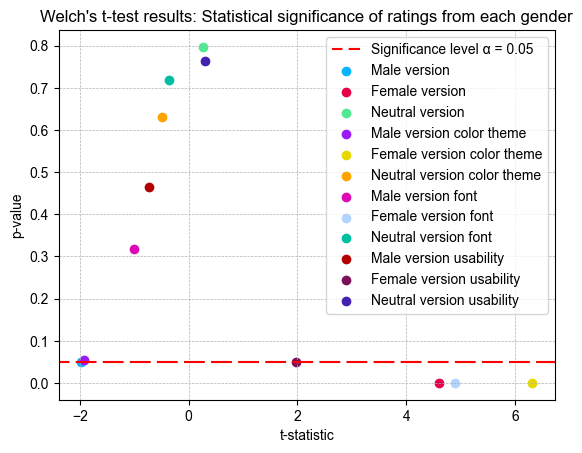

In [79]:
# T-test results visualization
colors = ["#0bb4ff", "#e60049",  "#50e991", "#9b19f5", "#e6d800",  "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0", "#b30000", "#7c1158", "#4421af"]

# Plot styling
plt.figure()
plt.title('Welch\'s t-test results: Statistical significance of ratings from each gender')
plt.xlabel('t-statistic')
plt.ylabel('p-value')
plt.axhline(0.05, label='Significance level α = 0.05', color = 'red', linestyle = (5, (10, 3)), linewidth = 1.5) # Significance leven a = 0.05
plt.grid(linestyle = '--', linewidth = 0.5)

# Plot data in a scatter plot
for i, row in ss.iterrows():
    plt.scatter(row['t-statistic'], row['p-value'],label = row['Feature'], color = colors[i] )

# Add legend
plt.legend()

<p style="text-align: justify;"> <b>EXPLANATION:</b> The null hypothesis (HO) of each test suggests that there is no significant difference in ratings between males and females for each feature of the table and plot above. Based on the corresponding p-values that are less than the significance level a = 0.05, we can claim that there is a significant difference between male and female ratings in: male version, female version usability, female version (strong evidence), female version font (strong evidence) and female version color theme (strong evidence). For better understanding see the points below the dashed red line (the significance level).</p>

<h4 style="font-weight: bold;">Pearson's Chi-Square Test: Statistical hypothesis testing for independence between gender and preferences (categorical data)</h4>

- Rounded/Sharp edges and gender

In [80]:
# Collect data and create contigency table
edges_data = pd.crosstab(data['Gender'], data['Rounded/sharp edges preference'])

# Chi2 contigency function
chi2, p_value, dof, expected = chi2_contingency(edges_data)

# Add results to a dataframe
res = {
    'Feature': ['Rounded/sharp edges preference'],
    'Chi-square statistic': [chi2],
    'P-value': [p_value]
}
ht = pd.DataFrame(data=res) # This dataframe will contain all results from conducted chi-square tests

- Biased by awareness of gender target and gender

In [81]:
# Collect data (from group a) and create contigency table
biased_data = pd.crosstab(group_a['Gender'], group_a['Biased by awareness of gender target'])

# Chi2 contigency function
chi2, p_value, dof, expected = chi2_contingency(biased_data)

# Add results to a dataframe
res = {
    'Feature': ['Biased by awareness of gender target'],
    'Chi-square statistic': [chi2],
    'P-value': [p_value]
}
# Add results to the dataframe 
ht = pd.concat([ht, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Images/videos preference and gender

In [82]:
# Collect data and create contigency table
im_vid_data = pd.crosstab(data['Gender'], data['Images/videos preference'])

# Chi2 contigency function
chi2, p_value, dof, expected = chi2_contingency(im_vid_data)

# Add results to a dataframe
res = {
    'Feature': ['Images/videos preference'],
    'Chi-square statistic': [chi2],
    'P-value': [p_value]
}
# Add results to the dataframe 
ht = pd.concat([ht, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Version with best images/videos preference and gender

In [83]:
# Collect data and create contigency table
best_im_vid_data = pd.crosstab(data['Gender'], data['Version with best images/videos'])

# Chi2 contigency function
chi2, p_value, dof, expected = chi2_contingency(best_im_vid_data)

# Add results to a dataframe
res = {
    'Feature': ['Version with best images/videos'],
    'Chi-square statistic': [chi2],
    'P-value': [p_value]
}
# Add results to the dataframe 
ht = pd.concat([ht, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Overwhelmed by videos and gender

In [84]:
# Collect data and create contigency table
vid_data = pd.crosstab(data['Gender'], data['Overwhelmed by videos'])

# Chi2 contigency function
chi2, p_value, dof, expected = chi2_contingency(vid_data)

# Add results to a dataframe
res = {
    'Feature': ['Overwhelmed by videos'],
    'Chi-square statistic': [chi2],
    'P-value': [p_value]
}
# Add results to the dataframe 
ht = pd.concat([ht, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Gender and best version preference

In [85]:
# Collect data and create contigency table
bv_data = pd.crosstab(data['Gender'], data['Best version'])

# Chi2 contigency function
chi2, p_value, dof, expected = chi2_contingency(bv_data)

# Add results to a dataframe
res = {
    'Feature': ['Best version'],
    'Chi-square statistic': [chi2],
    'P-value': [p_value]
}
# Add results to the dataframe 
ht = pd.concat([ht, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Gender and version with best color theme preference

In [86]:
# Collect data and create contigency table
bc_data = pd.crosstab(data['Gender'], data['Version with best color theme'])

# Chi2 contigency function
chi2, p_value, dof, expected = chi2_contingency(bc_data)

# Add results to a dataframe
res = {
    'Feature': ['Version with best color theme'],
    'Chi-square statistic': [chi2],
    'P-value': [p_value]
}
# Add results to the dataframe 
ht = pd.concat([ht, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

- Gender and version with best font preference

In [87]:
# Collect data and create contigency table
bf_data = pd.crosstab(data['Gender'], data['Version with best font'])

# Chi2 contigency function
chi2, p_value, dof, expected = chi2_contingency(bf_data)

# Add results to a dataframe
res = {
    'Feature': ['Version with best font'],
    'Chi-square statistic': [chi2],
    'P-value': [p_value]
}
# Add results to the dataframe 
ht = pd.concat([ht, pd.DataFrame(res)], ignore_index = True) # Ignore index of concatenated dataframes and create a new index for the result

In [88]:
# Add new column to ss dataframe to display the results of Pearson's chi square resr
# Calculate results, comparing each p-value to significance level (0.05)
results_ht = []
for p_value in ht['P-value']:
    if (p_value < 0.05):
        results_ht.append('Yes')
    else:
        results_ht.append('No')

# Insert results as a new column
ht.insert(3, 'Significant dependence with gender', results_ht)

In [89]:
# Display table with results
ht

,Feature,Chi-square statistic,P-value,Significant dependence with gender
0,Rounded/sharp edges preference,3.444332657451977,0.063469047924524,No
1,Biased by awareness of gender target,0.199930912661839,0.654776617103314,No
2,Images/videos preference,5.499226956271321,0.063952575498804,No
3,Version with best images/videos,5.793450305165883,0.055203708080552,No
4,Overwhelmed by videos,4.763115588548811,0.029075871622868,Yes
5,Best version,25.128421837600698,0.000003494882093,Yes
6,Version with best color theme,35.912508981893460,0.000000015911010,Yes
7,Version with best font,26.313027065259320,0.000001932852760,Yes


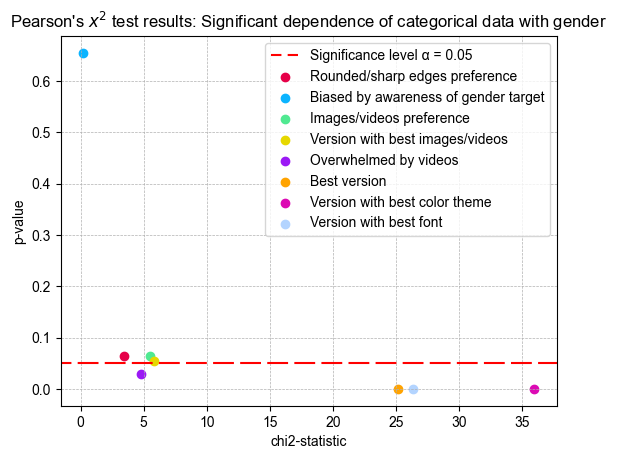

In [90]:
# Chi-square test results visualization
colors = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]



# Plot styling
plt.figure()
plt.title('Pearson\'s $x^{2}$ test results: Significant dependence of categorical data with gender')
plt.xlabel('chi2-statistic')
plt.ylabel('p-value')
plt.axhline(0.05, label='Significance level α = 0.05', color = 'red', linestyle = (5, (10, 3)), linewidth = 1.5) # Significance leven a = 0.05
plt.grid(linestyle = '--', linewidth = 0.5)

# Plot data in a scatter plot
for i, row in ht.iterrows():
    plt.scatter(row['Chi-square statistic'], row['P-value'],label = row['Feature'], color = colors[i] )

# Add legend
plt.legend()

<p style="text-align: justify;"> <b>EXPLANATION:</b> The null hypothesis (HO) of each test suggests that there is no significant association, dependence or relationship between the two categorical variables being analyzed (Gender and feature from column 'Features'). Based on the corresponding p-values that are less than the significance level a = 0.05, we can conclude that there is a significant association between gender and features 'Overwhelmed by videos', 'Best version' (strong evidence), 'Version with best color theme' (strong evidence) and 'Version with best font' (strong evidence). For better understanding see the points below the dashed red line (the significance level).</p>

<h3 style="font-weight: bold;"> Summary of ratings </h3>

In [91]:
# Merge all dictionaries with gendered ratings
summary_ratings = {**results, **results_color, **results_font, **results_usability}

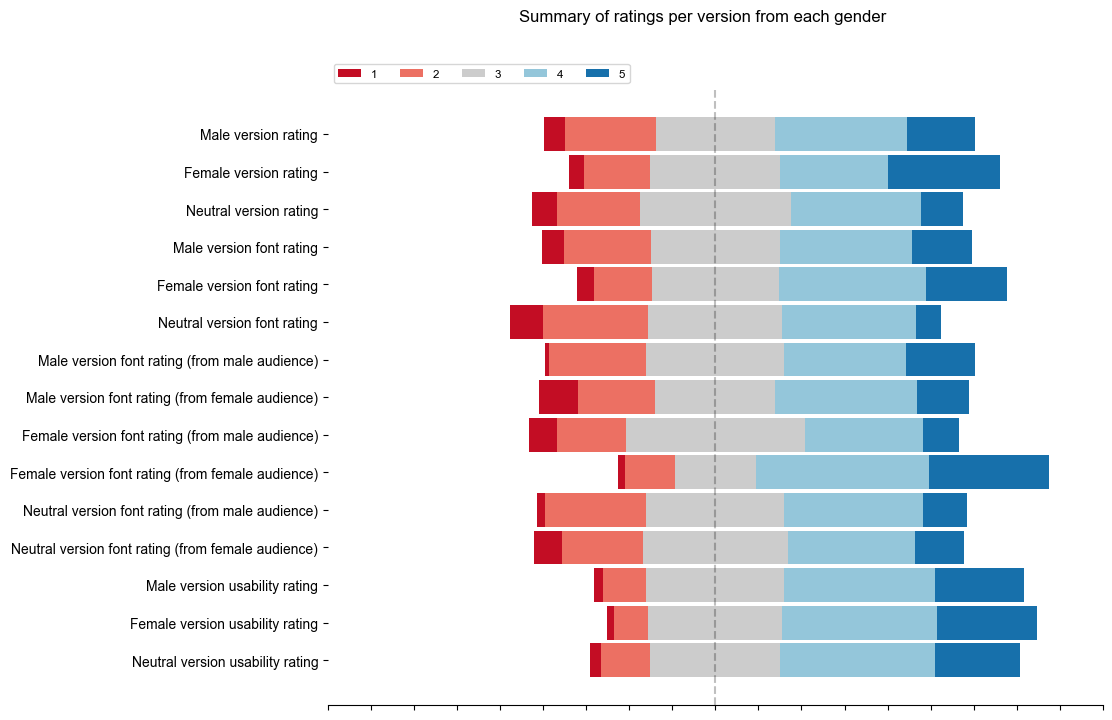

In [92]:
# Plot summary ratings
fig, ax = survey(summary_ratings, ['1', '2', '3', '4', '5'], 'Summary of ratings per version from each gender')
fig.set_size_inches(10, 8)
plt.show()